<a href="https://colab.research.google.com/github/niranjanbaviskar/patient-health-data-google-colab/blob/main/P%26S_PBL_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("diabetes_prediction_dataset.csv")
df1.head(10)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0       0.0  
1          6.6                 80.0       0.0  
2          5.7                158.0       0.0  
3          5.0                155.0       0.0  
4          4.8                155.0       0.0  
5          6.6                 85.0       0.0  
6          6.5                200.0       1.0  
7          5.7                 85.0       0.0  
8          4.8                145.0       0.0  
9          5.0                100.0       0.0

In [3]:
!pip install dash jupyter-dash plotly pandas
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash

# Load the dataset (Ensure it is uploaded in Colab)
file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Convert categorical variables into numerical representations
df_encoded = df.copy()
df_encoded['gender'] = df_encoded['gender'].astype('category').cat.codes
df_encoded['smoking_history'] = df_encoded['smoking_history'].astype('category').cat.codes

# Compute correlation matrix with only numerical columns
correlation_matrix = df_encoded.corr()

# Correlation Matrix Heatmap
fig_corr = px.imshow(correlation_matrix, text_auto=True, title="Correlation Matrix")

# Histogram of Blood Glucose Levels
fig_glucose = px.histogram(df, x='blood_glucose_level', color='diabetes', barmode='overlay',
                           title="Blood Glucose Levels Distribution", nbins=50)

# Scatter Plot: BMI vs. HbA1c Level
fig_scatter = px.scatter(df, x='bmi', y='HbA1c_level', color='diabetes',
                         title="BMI vs. HbA1c Level", labels={'bmi': 'BMI', 'HbA1c_level': 'HbA1c Level'})

# Create the Dash app
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Diabetes Risk Analysis Dashboard"),
    dcc.Graph(figure=fig_corr),  # Correlation Matrix
    dcc.Graph(figure=fig_glucose),  # Blood Glucose Histogram
    dcc.Graph(figure=fig_scatter)  # BMI vs HbA1c Scatter Plot
])

# Run the app in Colab
app.run_server(mode='inline')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


/usr/local/lib/python3.11/dist-packages/dash/dash.py:582: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



AttributeError: 'super' object has no attribute 'run_server'

<ipython-input-4-a13db9520a7c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="coolwarm")
<ipython-input-4-a13db9520a7c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="coolwarm")
<ipython-input-4-a13db9520a7c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="coolwarm")


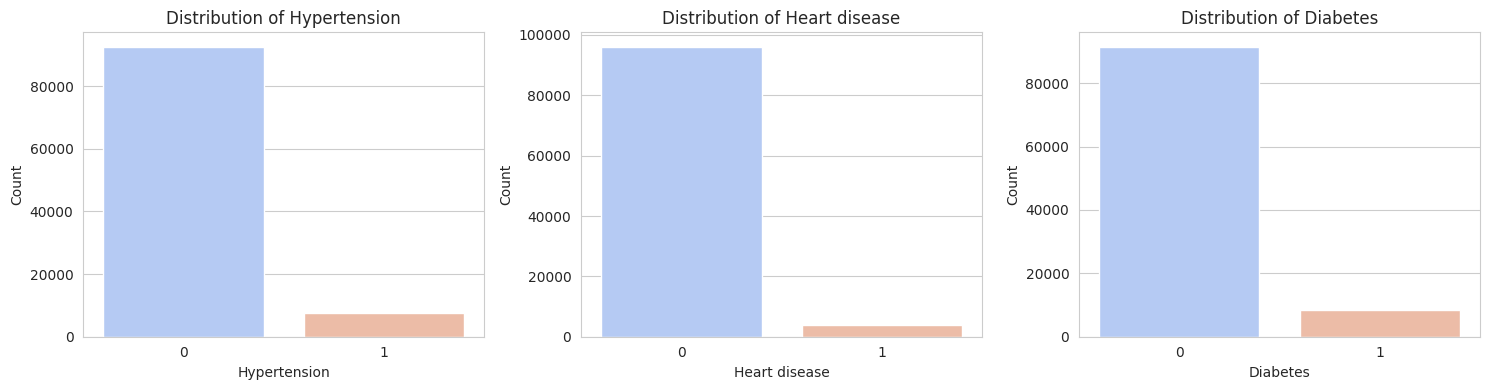

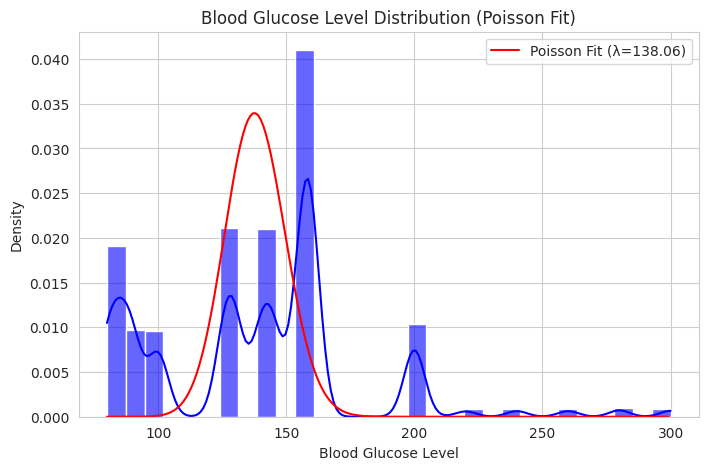

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Define binary columns for Binomial distribution
binary_cols = ['hypertension', 'heart_disease', 'diabetes']

# Define column for Blood Glucose Level (Poisson Check)
glucose_col = 'blood_glucose_level'

# Set plot style
sns.set_style("whitegrid")

# Binomial Distribution: Countplot for binary variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(binary_cols):
    sns.countplot(x=df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').capitalize()}")
    axes[i].set_xlabel(col.replace('_', ' ').capitalize())
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Check Poisson Distribution Fit for Blood Glucose Level
fig, ax = plt.subplots(figsize=(8, 5))

# Histogram of Blood Glucose Level
sns.histplot(df[glucose_col], bins=30, kde=True, stat="density", ax=ax, color="blue", alpha=0.6)

# Fit Poisson Distribution
mean_glucose = df[glucose_col].mean()
x_vals = np.arange(df[glucose_col].min(), df[glucose_col].max())
poisson_vals = stats.poisson.pmf(x_vals, mu=mean_glucose)

ax.plot(x_vals, poisson_vals, 'r-', label=f"Poisson Fit (λ={mean_glucose:.2f})")
ax.set_title("Blood Glucose Level Distribution (Poisson Fit)")
ax.set_xlabel("Blood Glucose Level")
ax.set_ylabel("Density")
ax.legend()

plt.show()


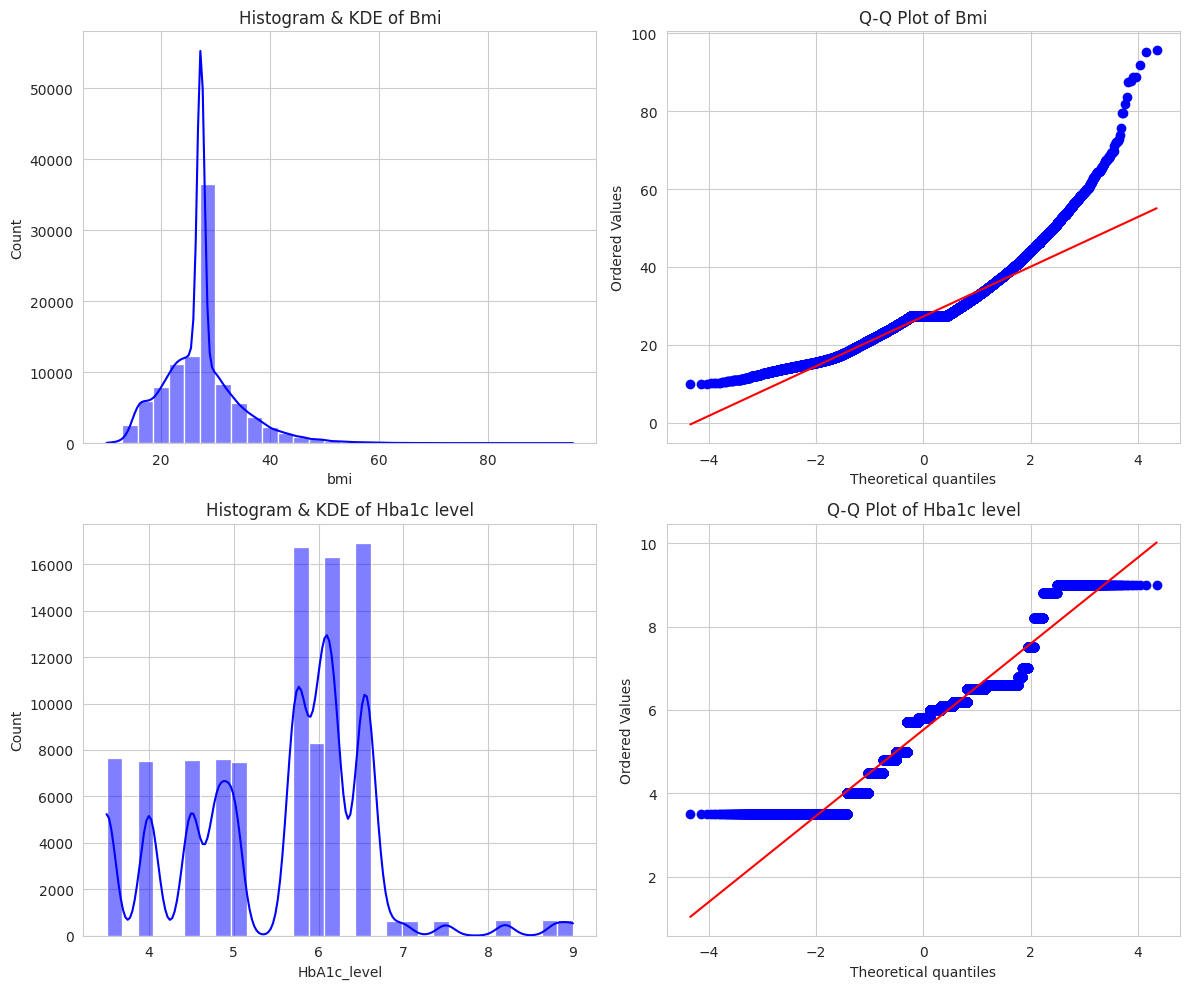

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)



Normality Test Results for Bmi:
Shapiro-Wilk Test: p-value = 0.00000 (p < 0.05 suggests non-normality)
Kolmogorov-Smirnov Test: p-value = 0.00000 (p < 0.05 suggests non-normality)

Normality Test Results for Hba1c level:
Shapiro-Wilk Test: p-value = 0.00000 (p < 0.05 suggests non-normality)
Kolmogorov-Smirnov Test: p-value = 0.00000 (p < 0.05 suggests non-normality)


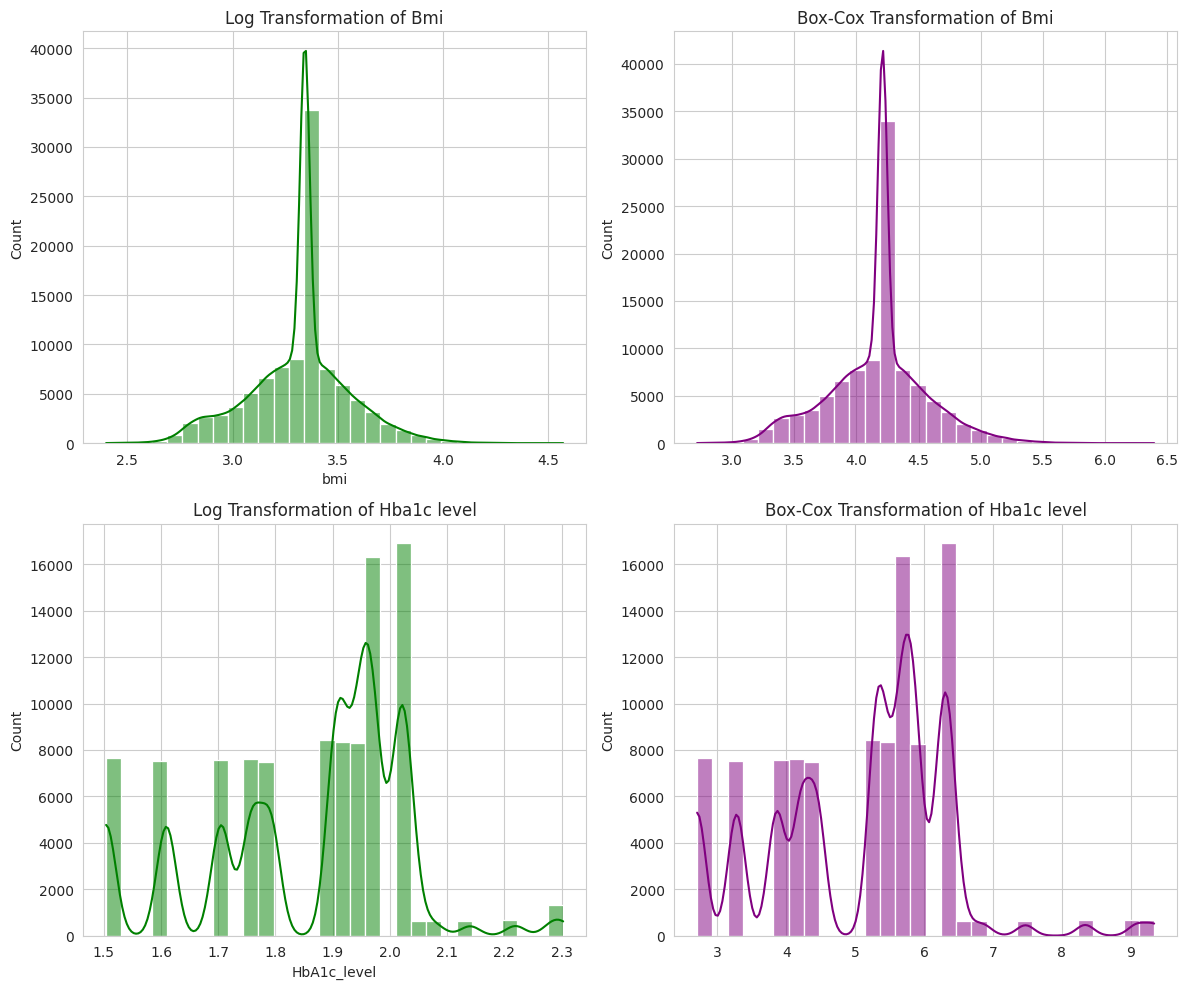

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Define numerical variables to check for normality
numeric_cols = ['bmi', 'HbA1c_level']

# Set plot style
sns.set_style("whitegrid")

# Plot histograms and Q-Q plots for normality check
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()  # Remove NaN values

    # Histogram with KDE
    sns.histplot(data, bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f"Histogram & KDE of {col.replace('_', ' ').capitalize()}")

    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"Q-Q Plot of {col.replace('_', ' ').capitalize()}")

plt.tight_layout()
plt.show()

# Normality Tests (Shapiro-Wilk & Kolmogorov-Smirnov)
for col in numeric_cols:
    data = df[col].dropna()

    shapiro_test = stats.shapiro(data)
    ks_test = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

    print(f"\nNormality Test Results for {col.replace('_', ' ').capitalize()}:")
    print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.5f} (p < 0.05 suggests non-normality)")
    print(f"Kolmogorov-Smirnov Test: p-value = {ks_test.pvalue:.5f} (p < 0.05 suggests non-normality)")

# Apply Log and Box-Cox Transformations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()

    # Log Transformation (only valid for positive values)
    log_data = np.log1p(data)  # log1p avoids log(0) issue
    sns.histplot(log_data, bins=30, kde=True, ax=axes[i, 0], color='green')
    axes[i, 0].set_title(f"Log Transformation of {col.replace('_', ' ').capitalize()}")

    # Box-Cox Transformation (only for positive values)
    if (data > 0).all():
        boxcox_data, _ = stats.boxcox(data)
        sns.histplot(boxcox_data, bins=30, kde=True, ax=axes[i, 1], color='purple')
        axes[i, 1].set_title(f"Box-Cox Transformation of {col.replace('_', ' ').capitalize()}")

plt.tight_layout()
plt.show()


Mean of Blood Glucose Level: 138.06
Variance of Blood Glucose Level: 1657.15
Mean is not close to variance, so data likely does not follow a Poisson distribution.


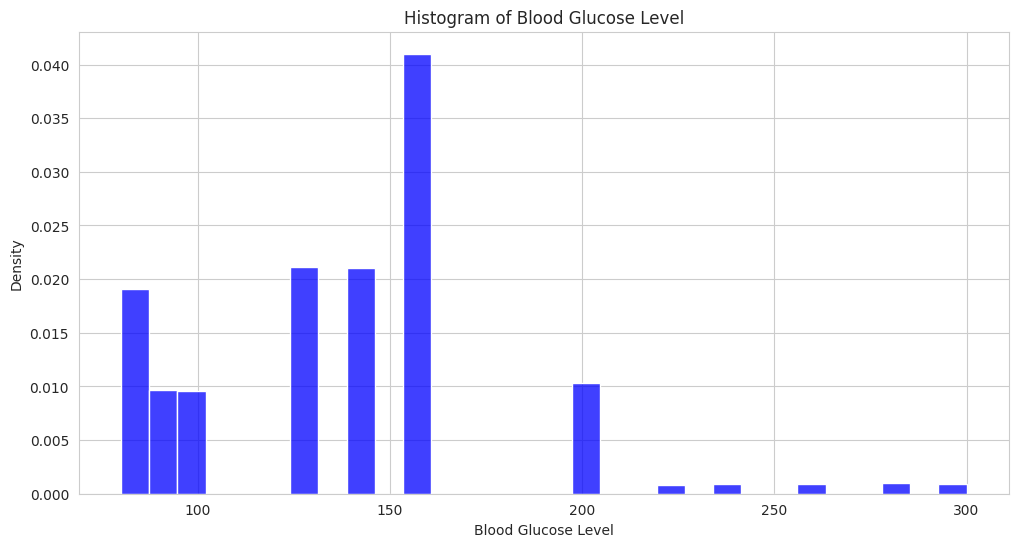

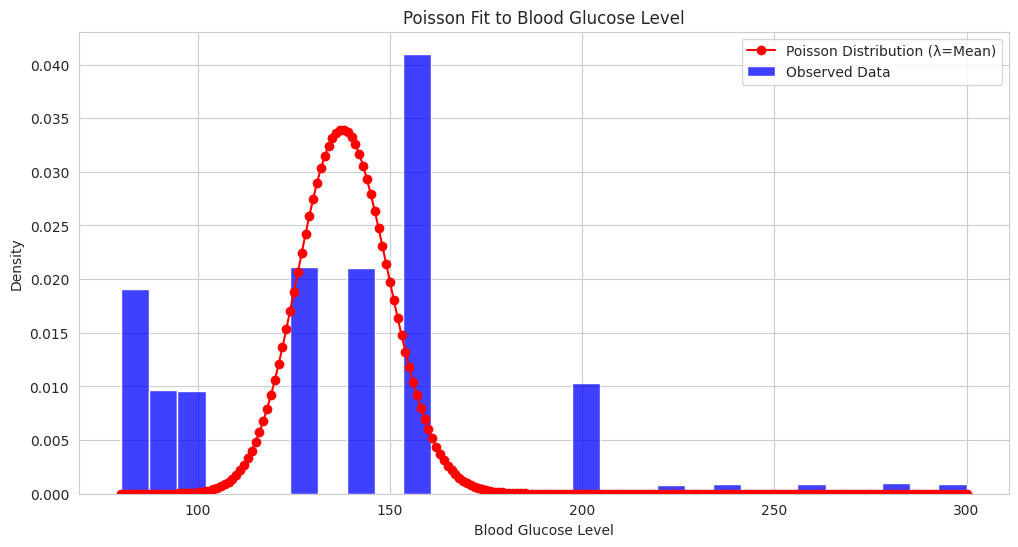


Kolmogorov-Smirnov Test for Poisson Fit:
Test Statistic: 0.33852
P-Value: 0.00000 (p < 0.05 suggests the data is NOT Poisson)

Chi-Square Goodness of Fit Test:
Chi-Square Statistic: 1209056872545862342325025432928256.00000
P-Value: 0.00000 (p < 0.05 suggests the data is NOT Poisson)


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Select Blood Glucose Level column
glucose_data = df['blood_glucose_level'].dropna()  # Remove NaN values

# Compute mean and variance
mean_glucose = np.mean(glucose_data)
var_glucose = np.var(glucose_data, ddof=1)  # Sample variance

print(f"Mean of Blood Glucose Level: {mean_glucose:.2f}")
print(f"Variance of Blood Glucose Level: {var_glucose:.2f}")

# Poisson distribution requires mean ≈ variance
if abs(mean_glucose - var_glucose) / mean_glucose < 0.1:
    print("Mean is approximately equal to variance, suggesting Poisson-like behavior.")
else:
    print("Mean is not close to variance, so data likely does not follow a Poisson distribution.")

# Histogram of Blood Glucose Level
plt.figure(figsize=(12, 6))
sns.histplot(glucose_data, bins=30, kde=False, color='blue', stat="density")
plt.title("Histogram of Blood Glucose Level")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Density")
plt.show()

# Compare empirical data with Poisson distribution
poisson_dist = stats.poisson.pmf(np.arange(min(glucose_data), max(glucose_data) + 1), mean_glucose)

plt.figure(figsize=(12, 6))
sns.histplot(glucose_data, bins=30, kde=False, color='blue', stat="density", label="Observed Data")
plt.plot(np.arange(min(glucose_data), max(glucose_data) + 1), poisson_dist, 'r-', marker='o', label="Poisson Distribution (λ=Mean)")
plt.legend()
plt.title("Poisson Fit to Blood Glucose Level")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Density")
plt.show()

# Perform the Kolmogorov-Smirnov test for goodness of fit
ks_test_stat, ks_p_value = stats.kstest(glucose_data, 'poisson', args=(mean_glucose,))

print(f"\nKolmogorov-Smirnov Test for Poisson Fit:")
print(f"Test Statistic: {ks_test_stat:.5f}")
print(f"P-Value: {ks_p_value:.5f} (p < 0.05 suggests the data is NOT Poisson)")

# Perform the Chi-Square Goodness of Fit Test
observed_freq, bins = np.histogram(glucose_data, bins=range(int(min(glucose_data)), int(max(glucose_data) + 2)))

# Expected frequency must be rescaled to match the total count of observations
expected_freq = len(glucose_data) * stats.poisson.pmf(bins[:-1], mean_glucose)
expected_freq = expected_freq * (sum(observed_freq) / sum(expected_freq))  # Normalize

# Ensure no zero expected frequencies (to avoid division errors)
expected_freq[expected_freq == 0] = 1e-8

chi_sq_stat, chi_sq_p_value = stats.chisquare(observed_freq, expected_freq)

print(f"\nChi-Square Goodness of Fit Test:")
print(f"Chi-Square Statistic: {chi_sq_stat:.5f}")
print(f"P-Value: {chi_sq_p_value:.5f} (p < 0.05 suggests the data is NOT Poisson)")


Estimated λ (Rate Parameter) for Exponential Distribution: 0.18091

Kolmogorov-Smirnov Test for Exponential Fit:
Test Statistic: 0.46911
P-Value: 0.00000 (p < 0.05 suggests the data is NOT Exponential)


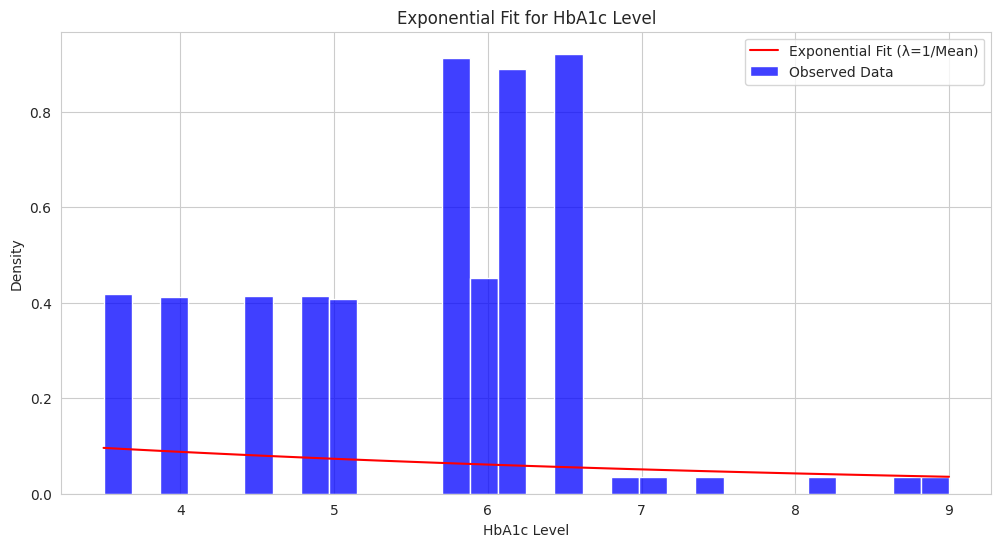

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Select HbA1c Level column and remove NaN values
hba1c_data = df["HbA1c_level"].dropna()

# Estimate λ (rate parameter) for Exponential Distribution (1/mean)
lambda_exp = 1 / np.mean(hba1c_data)

print(f"Estimated λ (Rate Parameter) for Exponential Distribution: {lambda_exp:.5f}")

# Perform Kolmogorov-Smirnov test for Exponential Fit
ks_stat, ks_p_value = stats.kstest(hba1c_data, 'expon', args=(0, 1/lambda_exp))

print("\nKolmogorov-Smirnov Test for Exponential Fit:")
print(f"Test Statistic: {ks_stat:.5f}")
print(f"P-Value: {ks_p_value:.5f} (p < 0.05 suggests the data is NOT Exponential)")

# Plot Histogram and Exponential Fit
plt.figure(figsize=(12, 6))
sns.histplot(hba1c_data, bins=30, kde=False, color='blue', stat="density", label="Observed Data")

# Generate Exponential PDF
x_values = np.linspace(min(hba1c_data), max(hba1c_data), 100)
exp_pdf = lambda_exp * np.exp(-lambda_exp * x_values)

plt.plot(x_values, exp_pdf, 'r-', label="Exponential Fit (λ=1/Mean)")
plt.legend()
plt.title("Exponential Fit for HbA1c Level")
plt.xlabel("HbA1c Level")
plt.ylabel("Density")
plt.show()


Column Names: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Statistics for Age:
Mean: 41.885856
Median: 43.0
Mode: 80.0
Variance: 507.00807780395684
Standard Deviation: 22.51683987161513
Range: 79.92
25th Percentile: 24.0
75th Percentile: 60.0
Skewness: -0.05197821709436702
Kurtosis: -1.0038448150961254
95% Confidence Interval for Mean: (41.75, 42.03)


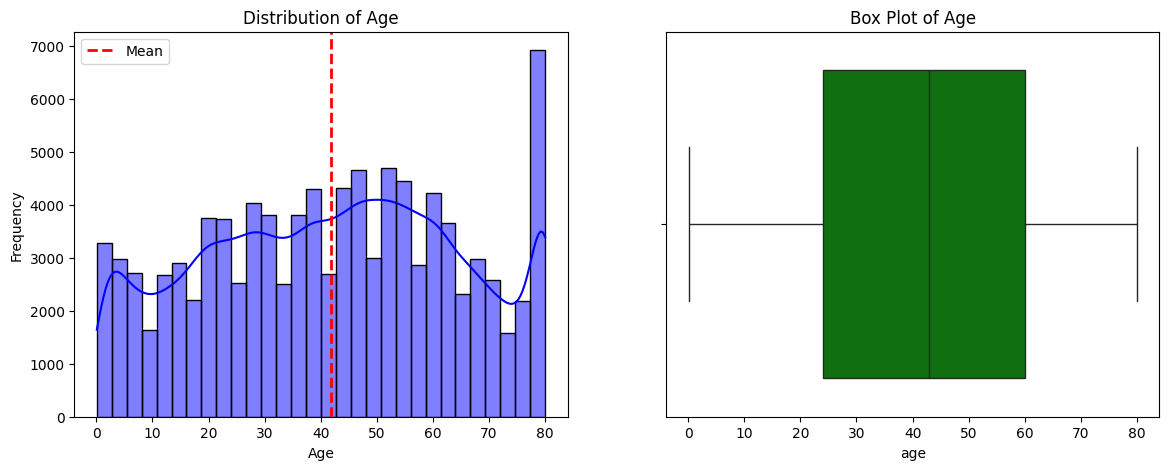


Statistics for Bmi:
Mean: 27.3207671
Median: 27.32
Mode: 27.32
Variance: 44.04689411951488
Standard Deviation: 6.636783416649581
Range: 85.67999999999999
25th Percentile: 23.63
75th Percentile: 29.58
Skewness: 1.0438198607100957
Kurtosis: 3.5205357642212842
95% Confidence Interval for Mean: (27.28, 27.36)


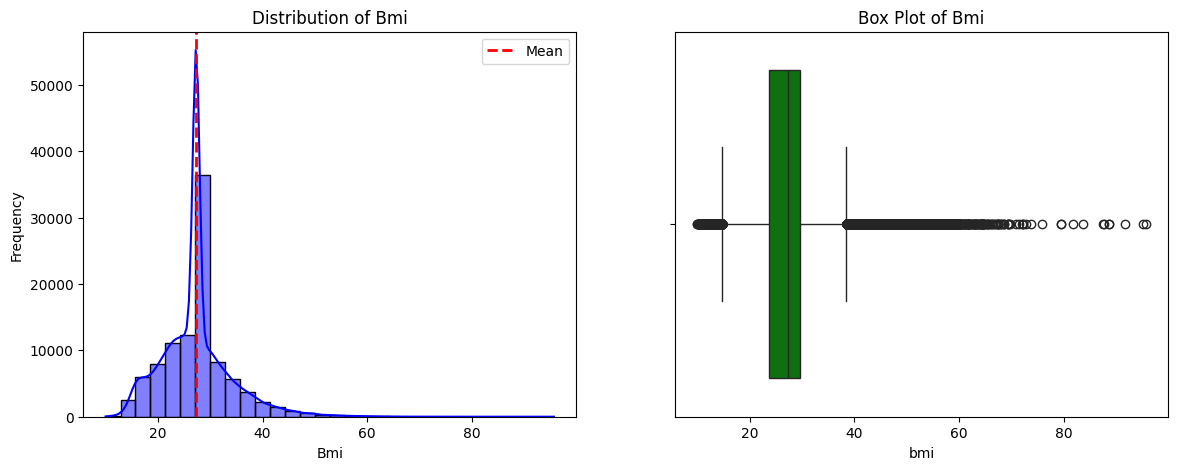


Statistics for Hba1c:
Mean: 5.527507
Median: 5.8
Mode: 6.6
Variance: 1.146338728337608
Standard Deviation: 1.0706720918832282
Range: 5.5
25th Percentile: 4.8
75th Percentile: 6.2
Skewness: -0.06685275833726789
Kurtosis: 0.21532154566873052
95% Confidence Interval for Mean: (5.52, 5.53)


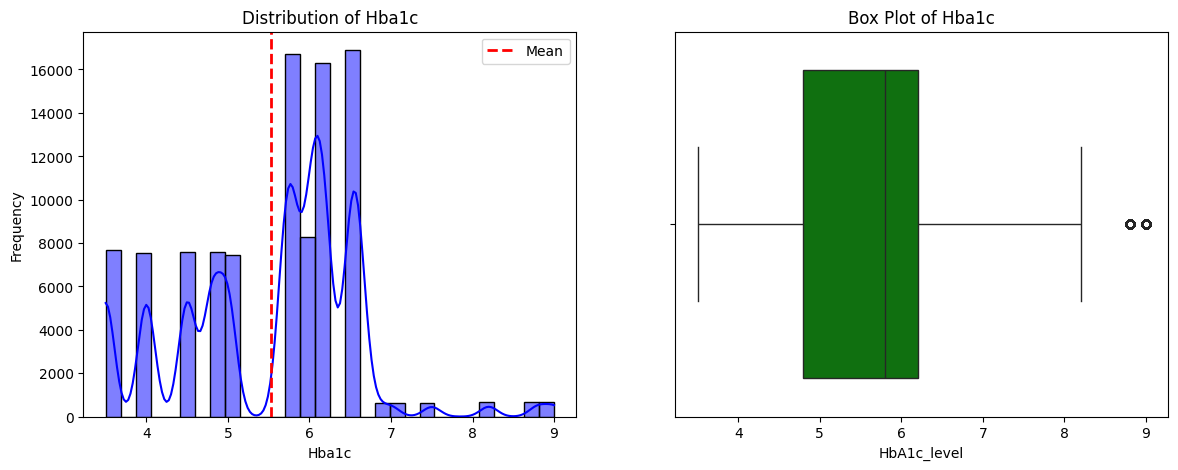


Statistics for Blood_glucose:
Mean: 138.05806
Median: 140.0
Mode: 130
Variance: 1657.1523405595601
Standard Deviation: 40.70813604870113
Range: 220
25th Percentile: 100.0
75th Percentile: 159.0
Skewness: 0.8216426268761283
Kurtosis: 1.7374766848300727
95% Confidence Interval for Mean: (137.81, 138.31)


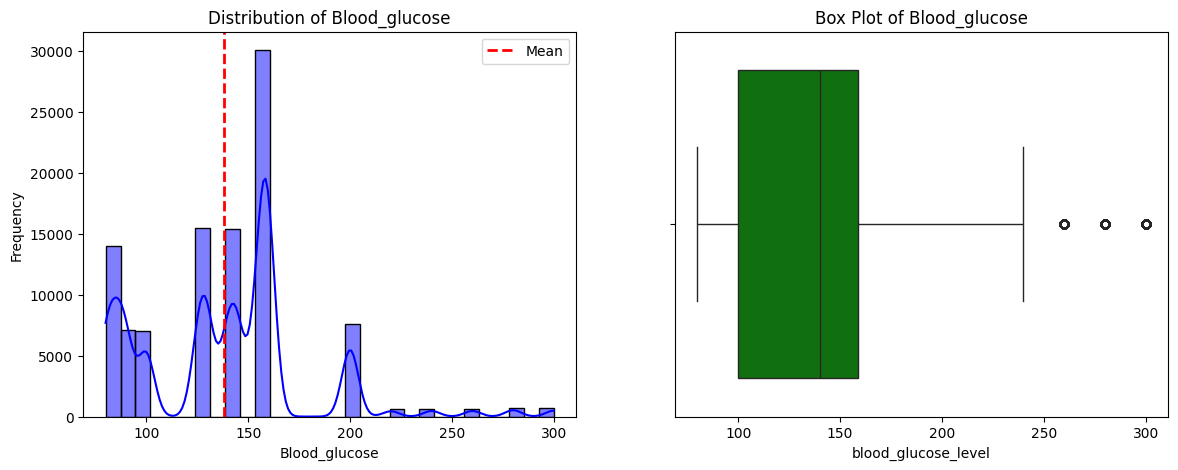


Proportion of Diabetic Patients: 0.0850


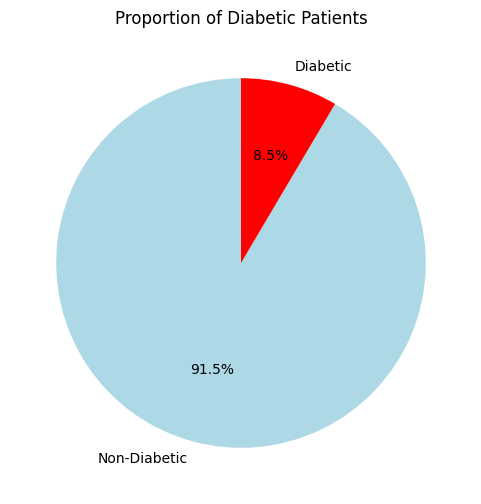

In [ ]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Verify column names
print("Column Names:", df1.columns)

# Ensure correct column names (update these based on actual dataset columns)
columns = {
    "age": "age",
    "bmi": "bmi",
    "hba1c": "HbA1c_level",  # Update based on actual column name
    "blood_glucose": "blood_glucose_level",  # Update based on actual column name
    "diabetes": "diabetes"
}

# Function to compute statistics and visualize
def compute_statistics(column_name, label):
    try:
        data = df1[column_name].dropna()  # Remove NaN values

        print(f"\nStatistics for {label}:")
        print("Mean:", np.mean(data))
        print("Median:", np.median(data))
        print("Mode:", statistics.mode(data))  # Using the correct mode function
        print("Variance:", np.var(data, ddof=1))
        print("Standard Deviation:", np.std(data, ddof=1))
        print("Range:", np.ptp(data))
        print("25th Percentile:", np.percentile(data, 25))
        print("75th Percentile:", np.percentile(data, 75))
        print("Skewness:", sc.skew(data))
        print("Kurtosis:", sc.kurtosis(data))

        # Compute confidence interval for mean (95% CI)
        confidence = 0.95
        n = len(data)
        mean = np.mean(data)
        std_err = sc.sem(data)  # Standard Error of the Mean
        margin_of_error = std_err * sc.t.ppf((1 + confidence) / 2., n-1)
        print(f"95% Confidence Interval for Mean: ({mean - margin_of_error:.2f}, {mean + margin_of_error:.2f})")

        # Visualization
        plt.figure(figsize=(14, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data, bins=30, kde=True, color="blue")
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label="Mean")
        plt.title(f'Distribution of {label}')
        plt.xlabel(label)
        plt.ylabel('Frequency')
        plt.legend()

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data, color="green")
        plt.title(f'Box Plot of {label}')

        plt.show()

    except KeyError:
        print(f"Column '{column_name}' not found in dataset.")
    except Exception as e:
        print(f"Error processing column '{column_name}': {e}")

# Compute statistics and visualization for numerical columns
for key, value in columns.items():
    if key != "diabetes":  # Avoid visualizing binary variable as a distribution
        compute_statistics(value, key.capitalize())

# Compute and visualize proportion of diabetics
diabetes_mean = np.mean(df1[columns["diabetes"]])
print(f"\nProportion of Diabetic Patients: {diabetes_mean:.4f}")

# Pie chart for Diabetes distribution
plt.figure(figsize=(6, 6))
diabetes_counts = df1[columns["diabetes"]].value_counts()
plt.pie(diabetes_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', colors=['lightblue', 'red'], startangle=90)
plt.title("Proportion of Diabetic Patients")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sc

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Verify column names
print("Column Names:", df1.columns)

# Ensure correct column names (update these based on actual dataset columns)
columns = {
    "age": "age",
    "bmi": "bmi",
    "hba1c": "HbA1c_level",  # Update based on actual column name
    "blood_glucose": "blood_glucose_level",  # Update based on actual column name
    "diabetes": "diabetes"
}

# Function to compute statistics
def compute_statistics(column_name, label):
    try:
        data = df1[column_name].dropna()  # Remove NaN values

        print(f"\nStatistics for {label}:")
        print("Mean:", np.mean(data))
        print("Median:", np.median(data))
        print("Mode:", statistics.mode(data))  # Using the correct mode function
        print("Variance:", np.var(data, ddof=1))
        print("Standard Deviation:", np.std(data, ddof=1))
        print("Range:", np.ptp(data))
        print("25th Percentile:", np.percentile(data, 25))
        print("75th Percentile:", np.percentile(data, 75))
        print("Skewness:", sc.skew(data))
        print("Kurtosis:", sc.kurtosis(data))

        # Compute confidence interval for mean (95% CI)
        confidence = 0.95
        n = len(data)
        mean = np.mean(data)
        std_err = sc.sem(data)  # Standard Error of the Mean
        margin_of_error = std_err * sc.t.ppf((1 + confidence) / 2., n-1)
        print(f"95% Confidence Interval for Mean: ({mean - margin_of_error:.2f}, {mean + margin_of_error:.2f})")

    except KeyError:
        print(f"Column '{column_name}' not found in dataset.")
    except Exception as e:
        print(f"Error processing column '{column_name}': {e}")

# Compute statistics for numerical columns
for key, value in columns.items():
    if key != "diabetes":  # Avoid visualizing binary variable as a distribution
        compute_statistics(value, key.capitalize())

# Compute proportion of diabetics
diabetes_mean = np.mean(df1[columns["diabetes"]])
print(f"\nProportion of Diabetic Patients: {diabetes_mean:.4f}")


Column Names: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Statistics for Age:
Mean: 41.885856
Median: 43.0
Mode: 80.0
Variance: 507.00807780395684
Standard Deviation: 22.51683987161513
Range: 79.92
25th Percentile: 24.0
75th Percentile: 60.0
Skewness: -0.05197821709436702
Kurtosis: -1.0038448150961254
95% Confidence Interval for Mean: (41.75, 42.03)

Statistics for Bmi:
Mean: 27.3207671
Median: 27.32
Mode: 27.32
Variance: 44.04689411951488
Standard Deviation: 6.636783416649581
Range: 85.67999999999999
25th Percentile: 23.63
75th Percentile: 29.58
Skewness: 1.0438198607100957
Kurtosis: 3.5205357642212842
95% Confidence Interval for Mean: (27.28, 27.36)

Statistics for Hba1c:
Mean: 5.527507
Median: 5.8
Mode: 6.6
Variance: 1.146338728337608
Standard Deviation: 1.0706720918832282
Range: 5.5
25th Percentile: 4.8
75th Percentile: 6.2
Skewness: -0.06685275833726789
Kurtosis:

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# 1. Simple Random Sampling (SRS) - Selecting 5% of the data randomly
srs_sample = df.sample(frac=0.05, random_state=42)

# 2. Systematic Sampling - Selecting every 20th record
k = 20
systematic_sample = df.iloc[::k, :]

# 3. Stratified Sampling - Ensuring proportional representation of diabetes cases
stratified_sample = df.groupby('diabetes', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))

# 4. Cluster Sampling - Dividing into age groups and selecting clusters
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71-100'])
selected_clusters = np.random.choice(df['age_group'].unique(), size=2, replace=False)  # Selecting 2 clusters randomly
cluster_sample = df[df['age_group'].isin(selected_clusters)]

# Display first few rows from each sampled dataset
print("\nSimple Random Sampling (SRS):")
print(srs_sample.head())

print("\nSystematic Sampling:")
print(systematic_sample.head())

print("\nStratified Sampling:")
print(stratified_sample.head())

print("\nCluster Sampling:")
print(cluster_sample.head())



Simple Random Sampling (SRS):
       gender   age  hypertension  heart_disease smoking_history    bmi  \
75721  Female  13.0             0              0         No Info  20.82   
80184  Female   3.0             0              0         No Info  21.00   
19864    Male  63.0             0              0          former  25.32   
76699  Female   2.0             0              0           never  17.43   
92991  Female  33.0             0              0     not current  40.08   

       HbA1c_level  blood_glucose_level  diabetes  
75721          5.8                  126         0  
80184          5.0                  145         0  
19864          3.5                  200         0  
76699          6.1                  126         0  
92991          6.2                  200         1  

Systematic Sampling:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0   Female  80.0             0              1           never  25.19   
20    Male  40.0             0          

<ipython-input-8-e34acd6f0b6c>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('diabetes', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Sample size (Example: Selecting 50 patients)
sample_size = 50

# Sampling With Replacement (Bootstrapping)
with_replacement_sample = df.sample(n=sample_size, replace=True, random_state=42)

# Sampling Without Replacement (Survey Selection)
without_replacement_sample = df.sample(n=sample_size, replace=False, random_state=42)

# Display sample results
print("\nSampling With Replacement (Bootstrapped Sample):")
print(with_replacement_sample.head())

print("\nSampling Without Replacement (Survey Sample):")
print(without_replacement_sample.head())



Sampling With Replacement (Bootstrapped Sample):
       gender   age  hypertension  heart_disease smoking_history    bmi  \
15795  Female  23.0             0              0           never  27.99   
860    Female  37.0             0              0           never  24.96   
76820    Male  42.0             0              0           never  26.14   
54886  Female  15.0             0              0           never  28.10   
6265     Male  49.0             0              0           never  32.98   

       HbA1c_level  blood_glucose_level  diabetes  
15795          5.0                  159         0  
860            6.2                  158         0  
76820          5.8                   85         0  
54886          5.0                  159         0  
6265           5.7                   80         0  

Sampling Without Replacement (Survey Sample):
       gender   age  hypertension  heart_disease smoking_history    bmi  \
75721  Female  13.0             0              0         No Info 

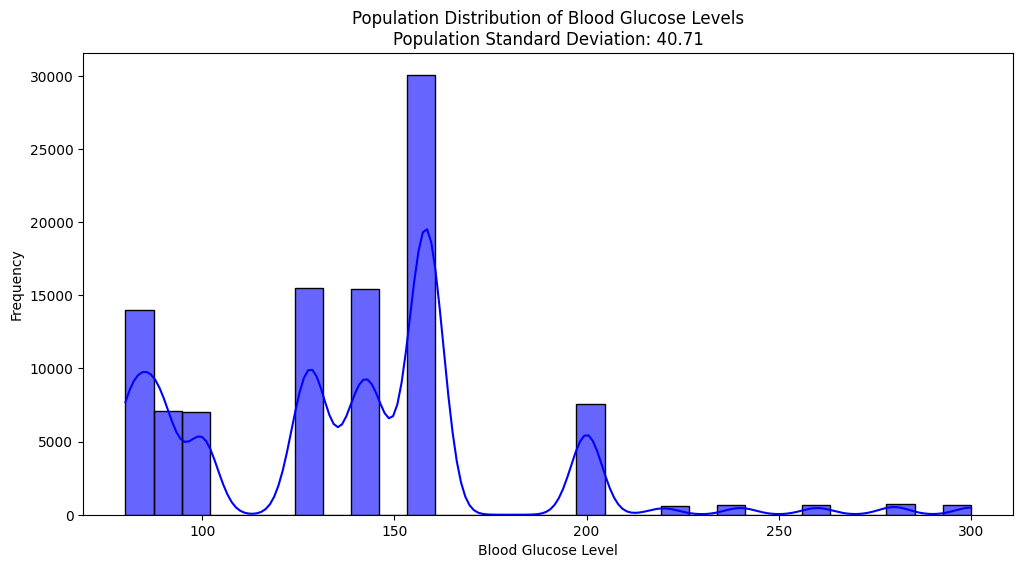

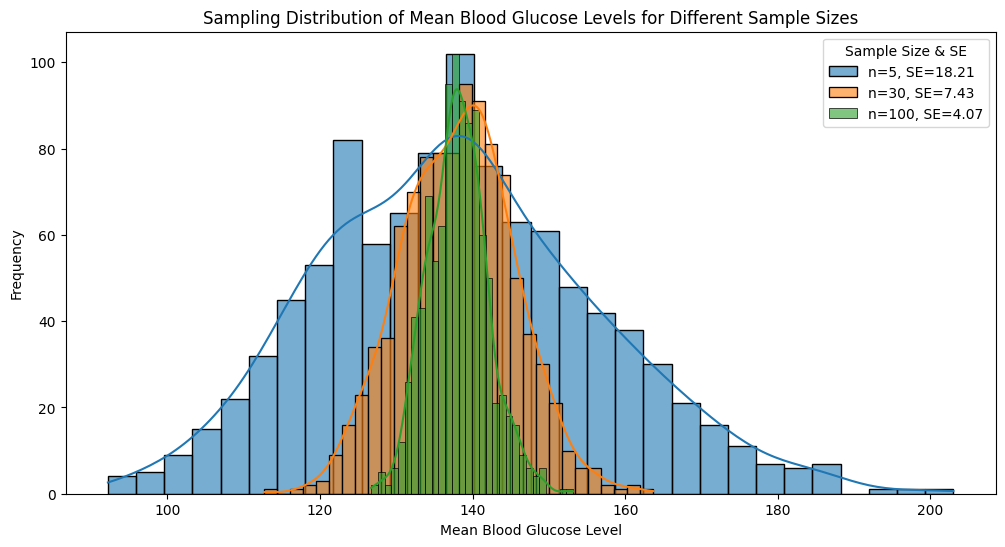

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Ensure correct column selection
df.rename(columns={"blood_glucose_level": "glucose"}, inplace=True)

# Assume 'glucose' column represents blood glucose levels
glucose_levels = df["glucose"].dropna()  # Removing NaN values if any

# Given Standard Deviation Values
std_dev_population = 40.71
std_errors = {5: 18.21, 30: 7.43, 100: 4.07}  # Given standard errors

# Function to generate sampling distributions
def sampling_distribution(sample_size, num_samples=1000):
    sample_means = [
        np.mean(np.random.choice(glucose_levels, size=sample_size, replace=True))
        for _ in range(num_samples)
    ]
    return sample_means

# Original Distribution of Blood Glucose Levels
plt.figure(figsize=(12, 6))
sns.histplot(glucose_levels, bins=30, kde=True, color='blue', alpha=0.6)
plt.title("Population Distribution of Blood Glucose Levels\n"
          f"Population Standard Deviation: {std_dev_population:.2f}")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Frequency")
plt.show()

# Sampling Distributions for Different Sample Sizes
plt.figure(figsize=(12, 6))
for n in std_errors.keys():
    means = sampling_distribution(sample_size=n)
    sns.histplot(means, bins=30, kde=True, alpha=0.6, label=f"n={n}, SE={std_errors[n]:.2f}")

plt.title("Sampling Distribution of Mean Blood Glucose Levels for Different Sample Sizes")
plt.xlabel("Mean Blood Glucose Level")
plt.ylabel("Frequency")
plt.legend(title="Sample Size & SE")
plt.show()


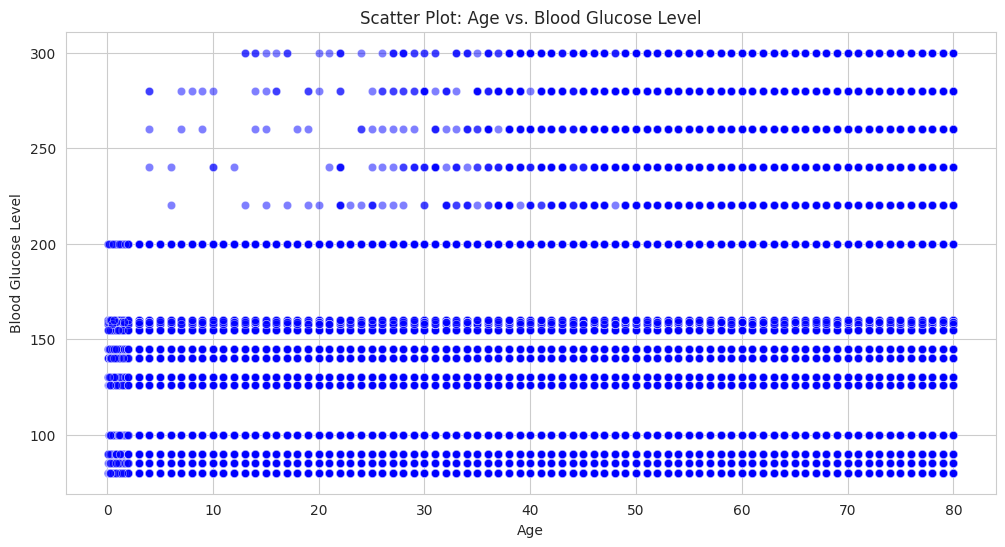

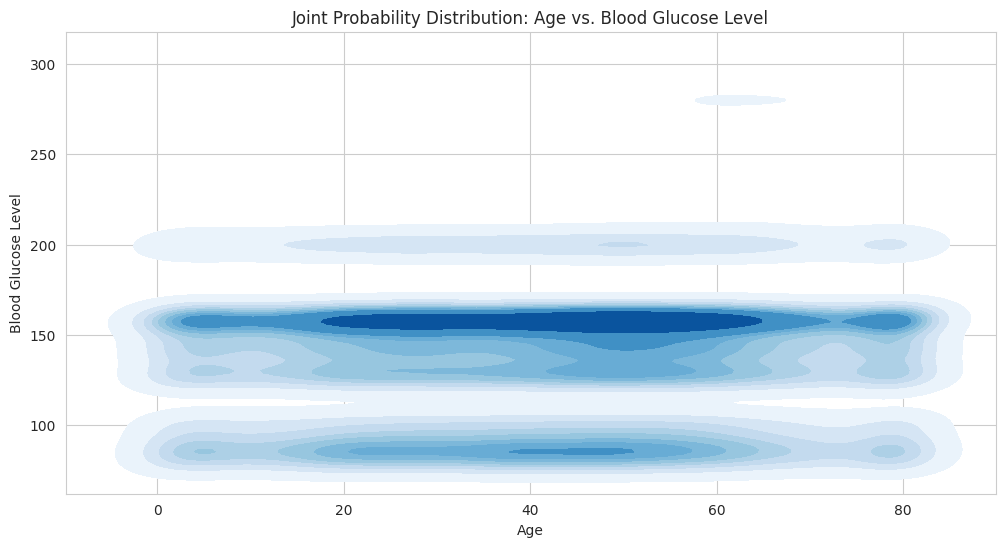

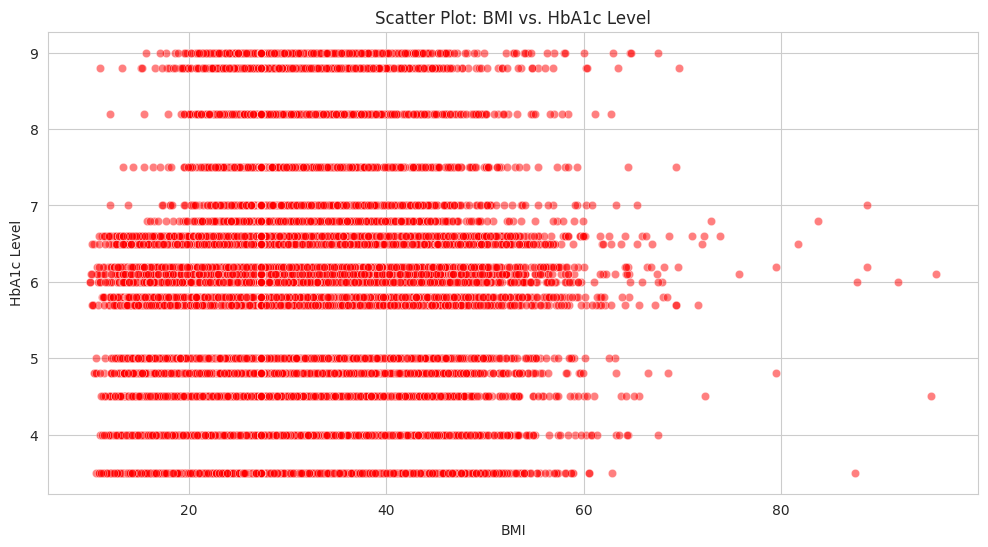

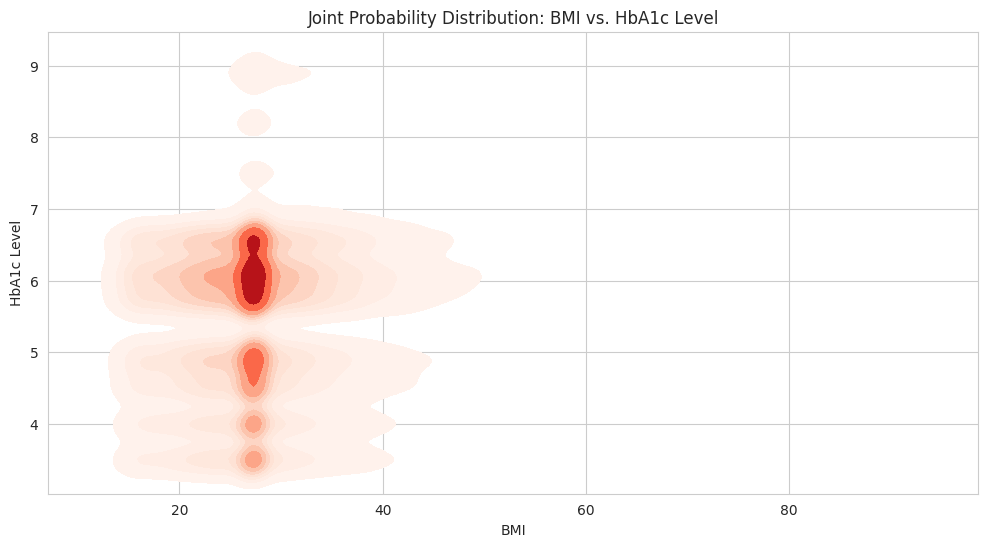

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Drop NaN values for selected columns
df = df.dropna(subset=["age", "blood_glucose_level", "bmi", "HbA1c_level"])

# Set style
sns.set_style("whitegrid")

# Scatter Plot: Age vs. Blood Glucose Level
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["age"], y=df["blood_glucose_level"], alpha=0.5, color="blue")
plt.title("Scatter Plot: Age vs. Blood Glucose Level")
plt.xlabel("Age")
plt.ylabel("Blood Glucose Level")
plt.show()

# KDE Plot: Age vs. Blood Glucose Level
plt.figure(figsize=(12, 6))
sns.kdeplot(x=df["age"], y=df["blood_glucose_level"], cmap="Blues", fill=True)
plt.title("Joint Probability Distribution: Age vs. Blood Glucose Level")
plt.xlabel("Age")
plt.ylabel("Blood Glucose Level")
plt.show()

# Scatter Plot: BMI vs. HbA1c Level
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["bmi"], y=df["HbA1c_level"], alpha=0.5, color="red")
plt.title("Scatter Plot: BMI vs. HbA1c Level")
plt.xlabel("BMI")
plt.ylabel("HbA1c Level")
plt.show()

# KDE Plot: BMI vs. HbA1c Level
plt.figure(figsize=(12, 6))
sns.kdeplot(x=df["bmi"], y=df["HbA1c_level"], cmap="Reds", fill=True)
plt.title("Joint Probability Distribution: BMI vs. HbA1c Level")
plt.xlabel("BMI")
plt.ylabel("HbA1c Level")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Load the diabetes dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Extract the blood glucose level column
glucose_levels = df['blood_glucose_level'].dropna()  # Remove NaN values

# Define sample size
sample_size = 30

# Take a random sample WITHOUT replacement (survey sample)
sample = df['blood_glucose_level'].sample(n=sample_size, replace=False, random_state=42)

# Compute sample statistics
sample_mean = np.mean(sample)
sample_std_dev = np.std(sample, ddof=1)  # Using ddof=1 for unbiased sample variance
sample_variance = np.var(sample, ddof=1)

# Degrees of freedom
df = sample_size - 1

# Compute t-critical value for 95% confidence level
t_critical = stats.t.ppf(0.975, df)  # Two-tailed test, 95% confidence

# Compute margin of error
margin_of_error = t_critical * (sample_std_dev / np.sqrt(sample_size))

# Compute confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Sample Standard Deviation: {sample_std_dev:.2f}")
print(f"t-Critical Value (df={df}): {t_critical:.3f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval for Population Mean: {confidence_interval}")


Sample Mean: 137.77
Sample Variance: 1753.36
Sample Standard Deviation: 41.87
t-Critical Value (df=29): 2.045
Margin of Error: 15.64
95% Confidence Interval for Population Mean: (122.1309898470208, 153.40234348631256)


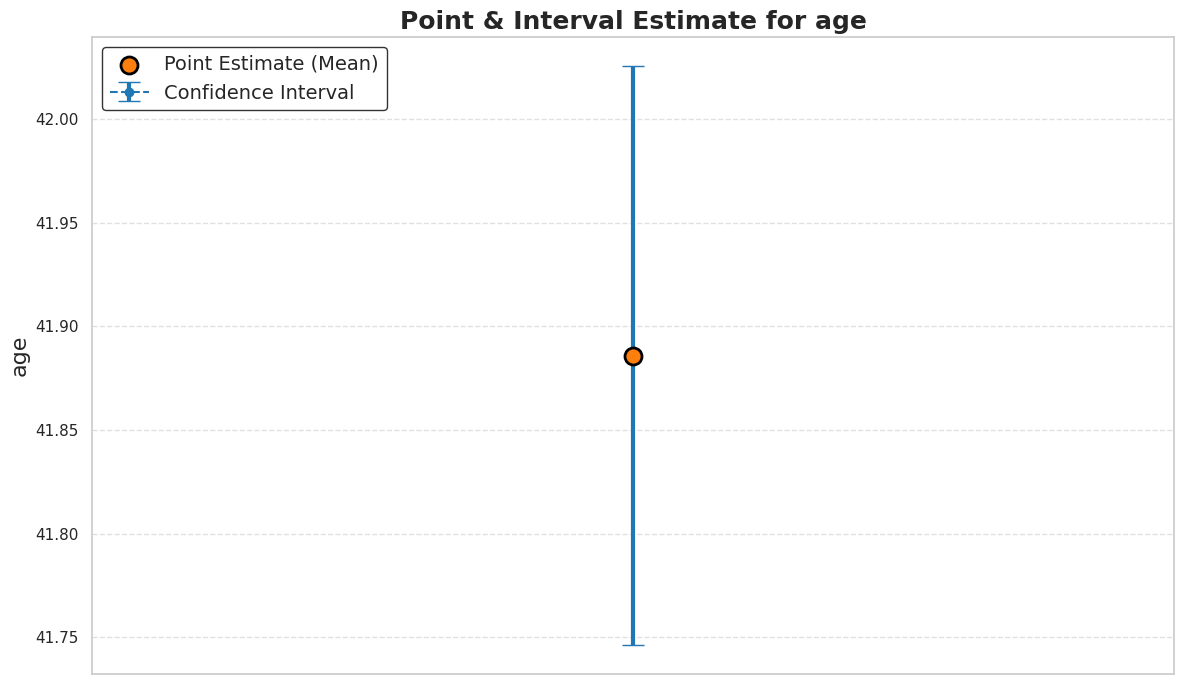

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Function to calculate point and interval estimates
def calculate_estimates(data, column, confidence=0.95):
    sample = data[column].dropna()  # Remove missing values
    n = len(sample)

    # Point Estimates
    mean_estimate = np.mean(sample)
    proportion_estimate = np.mean(sample) if sample.dtype == 'int' or sample.dtype == 'bool' else None

    # Interval Estimates (Confidence Interval for Mean)
    std_err = stats.sem(sample)
    ci_mean = stats.t.interval(confidence, df=n-1, loc=mean_estimate, scale=std_err)

    # Confidence Interval for Proportion (if categorical/binary)
    if proportion_estimate is not None:
        ci_proportion = stats.binom.interval(confidence, n, proportion_estimate, loc=0)
        ci_proportion = (ci_proportion[0] / n, ci_proportion[1] / n)
    else:
        ci_proportion = None

    return {
        "Point Estimate (Mean)": mean_estimate,
        "Confidence Interval (Mean)": ci_mean,
        "Point Estimate (Proportion)": proportion_estimate,
        "Confidence Interval (Proportion)": ci_proportion
    }

# Function to visualize the estimates
def visualize_estimates(data, column, confidence=0.95):
    estimates = calculate_estimates(data, column, confidence)

    # Set Seaborn style for the plots
    sns.set(style="whitegrid", palette="muted")

    # Visualization for Mean Estimate
    fig, ax = plt.subplots(figsize=(12, 7))
    mean = estimates["Point Estimate (Mean)"]
    ci_lower, ci_upper = estimates["Confidence Interval (Mean)"]

    # Enhanced error bar visualization
    ax.errorbar(x=1, y=mean, yerr=[[mean - ci_lower], [ci_upper - mean]], fmt='o', color='#1f77b4', capsize=8, label="Confidence Interval", elinewidth=3, linestyle='--', zorder=2)
    ax.scatter(1, mean, color='#ff7f0e', s=150, label="Point Estimate (Mean)", zorder=3, edgecolors='black', linewidth=2)

    # Annotating the point and confidence interval
    ax.annotate(f'{mean:.2f}', (1, mean + 0.3), ha='center', fontsize=14, color='#ff7f0e', fontweight='bold', zorder=4)
    ax.annotate(f'CI: {ci_lower:.2f} - {ci_upper:.2f}', (1, mean - 0.3), ha='center', fontsize=14, color='#1f77b4', fontweight='bold', zorder=4)

    # Customizing the plot
    ax.set_xticks([])  # No x-axis ticks needed
    ax.set_ylabel(column, fontsize=16)
    ax.set_title(f"Point & Interval Estimate for {column}", fontsize=18, fontweight='bold')
    ax.legend(loc='upper left', fontsize=14, frameon=True, facecolor='white', edgecolor='black')
    ax.grid(True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Visualization for Proportion (if applicable)
    if estimates["Point Estimate (Proportion)"] is not None:
        prop_mean = estimates["Point Estimate (Proportion)"]
        prop_ci_lower, prop_ci_upper = estimates["Confidence Interval (Proportion)"]

        # Enhanced bar plot for Proportion estimate
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.errorbar(x=1, y=prop_mean, yerr=[[prop_mean - prop_ci_lower], [prop_ci_upper - prop_mean]], fmt='o', color='#2ca02c', capsize=8, label="Confidence Interval", elinewidth=3, linestyle='--', zorder=2)
        ax.scatter(1, prop_mean, color='#ff9f00', s=150, label="Point Estimate (Proportion)", zorder=3, edgecolors='black', linewidth=2)

        # Annotating the point and confidence interval for Proportion
        ax.annotate(f'{prop_mean:.2f}', (1, prop_mean + 0.02), ha='center', fontsize=14, color='#ff9f00', fontweight='bold', zorder=4)
        ax.annotate(f'CI: {prop_ci_lower:.2f} - {prop_ci_upper:.2f}', (1, prop_mean - 0.02), ha='center', fontsize=14, color='#2ca02c', fontweight='bold', zorder=4)

        # Customizing the plot
        ax.set_xticks([])  # No x-axis ticks needed
        ax.set_ylabel(column, fontsize=16)
        ax.set_title(f"Proportion Estimate for {column}", fontsize=18, fontweight='bold')
        ax.legend(loc='upper left', fontsize=14, frameon=True, facecolor='white', edgecolor='black')
        ax.grid(True, linestyle='--', alpha=0.6)

        # Show the plot
        plt.tight_layout()
        plt.show()

# Example usage
column_name = "age"  # Change based on dataset column (e.g., "bmi", "blood_glucose_level", etc.)
visualize_estimates(df1, column_name)


<ipython-input-4-356e3f753b3f>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabetes Status")


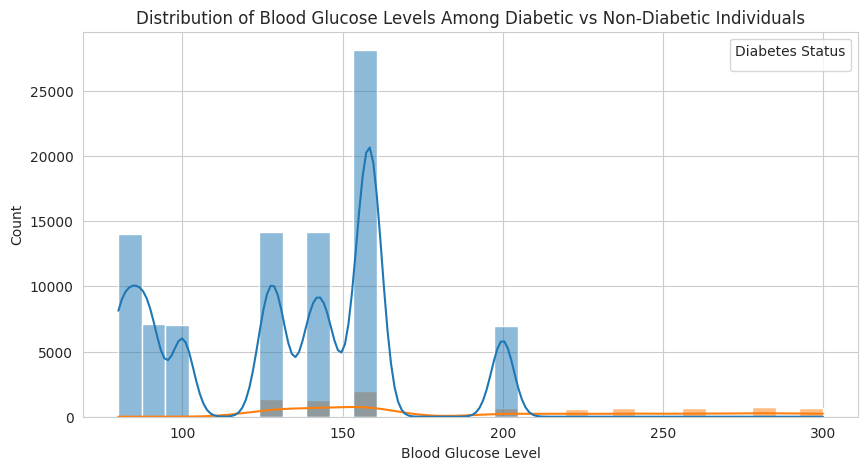

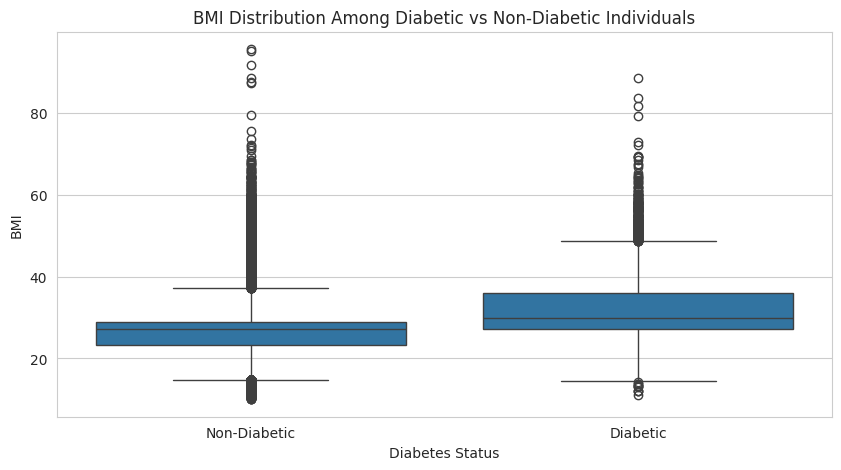

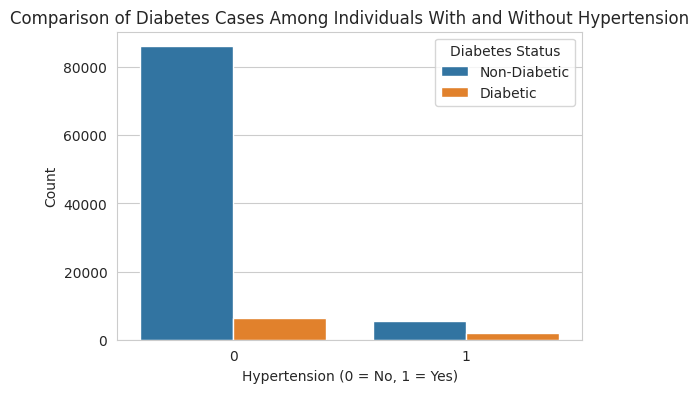

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Convert 'diabetes' column to categorical labels
df1['diabetes'] = df1['diabetes'].map({0: "Non-Diabetic", 1: "Diabetic"})

# Set visualization style
sns.set_style("whitegrid")

# 1. Blood Glucose Level vs Diabetes
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x="blood_glucose_level", hue="diabetes", kde=True, bins=30)
plt.title("Distribution of Blood Glucose Levels Among Diabetic vs Non-Diabetic Individuals")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()

# 2. BMI vs Diabetes
plt.figure(figsize=(10, 5))
sns.boxplot(x="diabetes", y="bmi", data=df1)
plt.title("BMI Distribution Among Diabetic vs Non-Diabetic Individuals")
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.show()

# 3. Hypertension vs Diabetes
plt.figure(figsize=(6, 4))
sns.countplot(x="hypertension", hue="diabetes", data=df1)
plt.title("Comparison of Diabetes Cases Among Individuals With and Without Hypertension")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()


<ipython-input-5-b507ae52861d>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabetes Status")


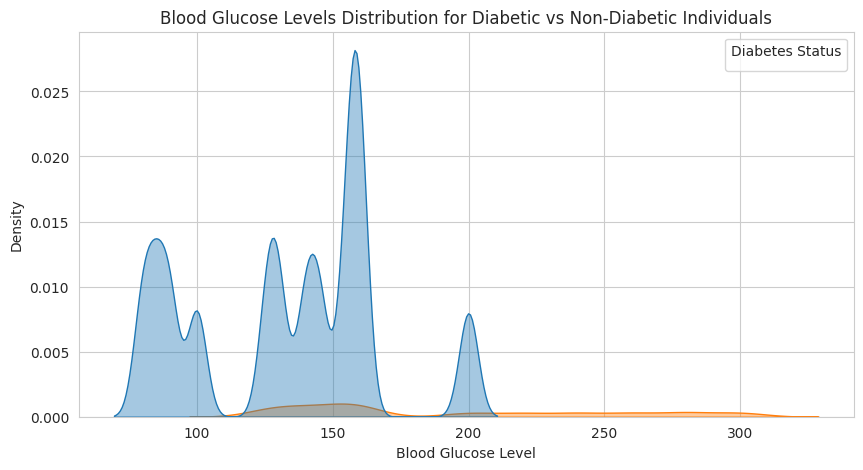

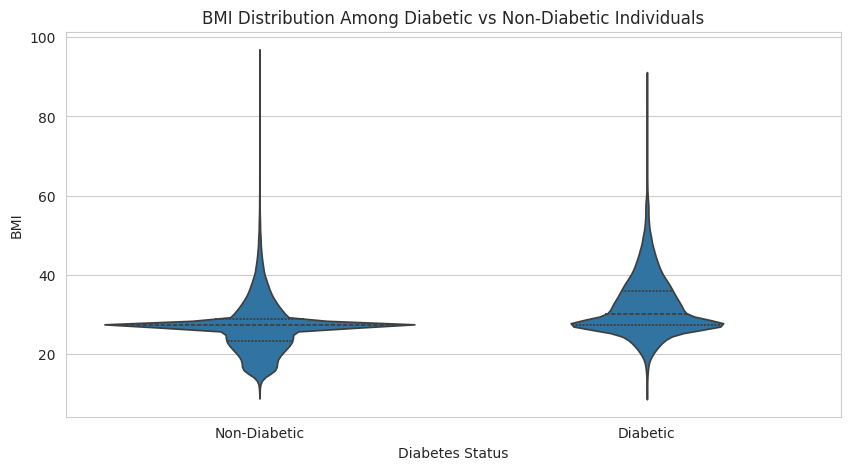

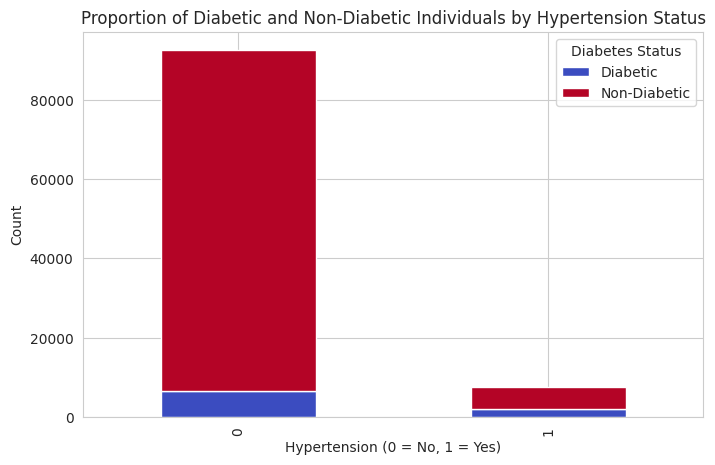

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Convert 'diabetes' column to categorical labels
df1['diabetes'] = df1['diabetes'].map({0: "Non-Diabetic", 1: "Diabetic"})

# Set visualization style
sns.set_style("whitegrid")

# 1. KDE Plot - Blood Glucose Levels vs Diabetes
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df1, x="blood_glucose_level", hue="diabetes", fill=True, alpha=0.4)
plt.title("Blood Glucose Levels Distribution for Diabetic vs Non-Diabetic Individuals")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Density")
plt.legend(title="Diabetes Status")
plt.show()

# 2. Violin Plot - BMI vs Diabetes
plt.figure(figsize=(10, 5))
sns.violinplot(x="diabetes", y="bmi", data=df1, inner="quartile")
plt.title("BMI Distribution Among Diabetic vs Non-Diabetic Individuals")
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.show()

# 3. Stacked Bar Chart - Hypertension vs Diabetes
hypertension_counts = df1.groupby(["hypertension", "diabetes"]).size().unstack()

# Plot stacked bar chart
hypertension_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
plt.title("Proportion of Diabetic and Non-Diabetic Individuals by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()


1. Blood Glucose Level vs Diabetes
T-statistic: 94.795, P-value: 0.00000
Result: Reject H0 - Blood glucose level significantly affects diabetes.



<ipython-input-7-c32fc201adfb>:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabetes Status")


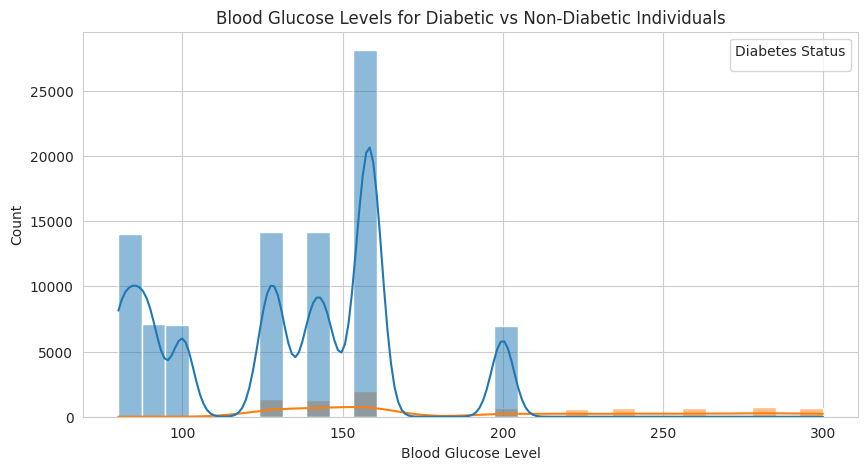

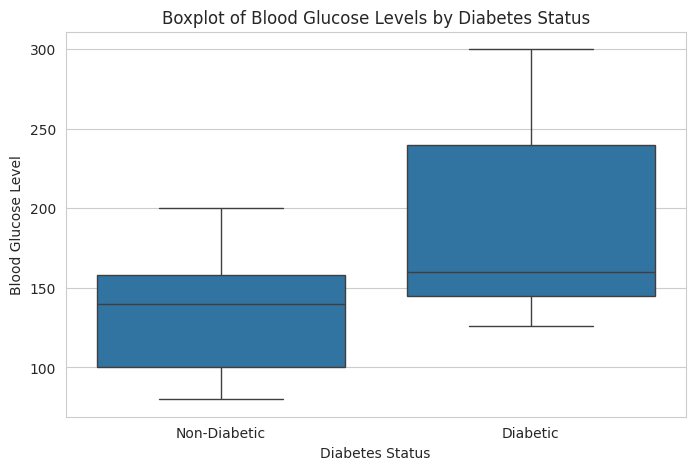

2. BMI vs Diabetes
T-statistic: 60.265, P-value: 0.00000
Result: Reject H0 - Higher BMI is associated with diabetes.



<ipython-input-7-c32fc201adfb>:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabetes Status")


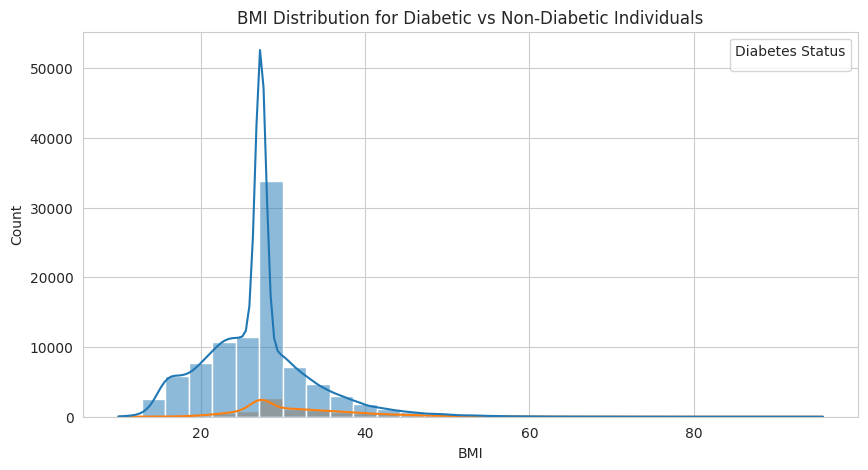

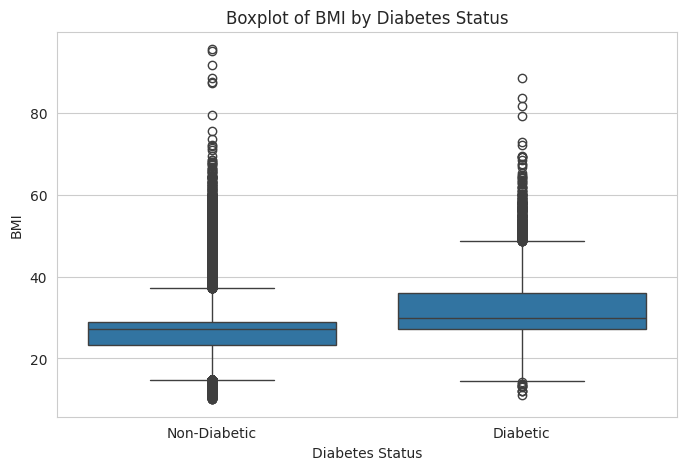

3. Hypertension vs Diabetes
Chi-square Statistic: 3910.709, P-value: 0.00000
Result: Reject H0 - Hypertension is significantly associated with diabetes.



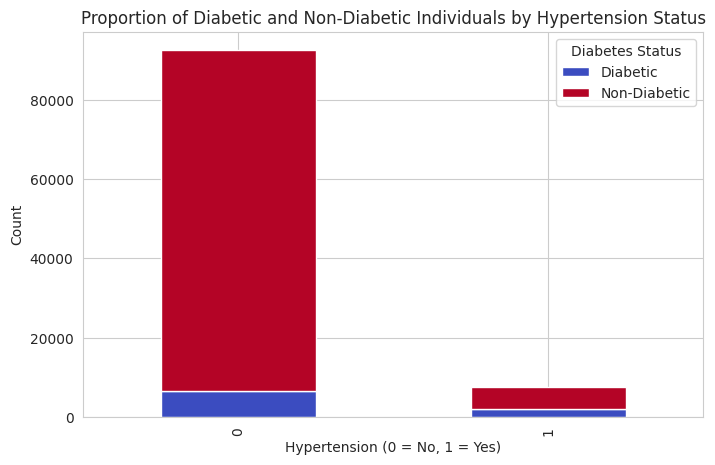

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Convert diabetes to categorical labels
df1["diabetes"] = df1["diabetes"].map({0: "Non-Diabetic", 1: "Diabetic"})

# Split data into diabetic and non-diabetic groups
diabetic = df1[df1["diabetes"] == "Diabetic"]
non_diabetic = df1[df1["diabetes"] == "Non-Diabetic"]

### 1. Independent t-test: Blood Glucose Level vs Diabetes
t_stat_glucose, p_value_glucose = stats.ttest_ind(diabetic["blood_glucose_level"],
                                                   non_diabetic["blood_glucose_level"],
                                                   equal_var=False)  # Welch's t-test

print("1. Blood Glucose Level vs Diabetes")
print(f"T-statistic: {t_stat_glucose:.3f}, P-value: {p_value_glucose:.5f}")
if p_value_glucose < 0.05:
    print("Result: Reject H0 - Blood glucose level significantly affects diabetes.\n")
else:
    print("Result: Fail to reject H0 - No significant difference in blood glucose levels.\n")

# Visualization: Blood Glucose Levels Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x="blood_glucose_level", hue="diabetes", kde=True, bins=30, alpha=0.5)
plt.title("Blood Glucose Levels for Diabetic vs Non-Diabetic Individuals")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()

# Boxplot for Blood Glucose Levels
plt.figure(figsize=(8, 5))
sns.boxplot(x="diabetes", y="blood_glucose_level", data=df1)
plt.title("Boxplot of Blood Glucose Levels by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Blood Glucose Level")
plt.show()

### 2. Independent t-test: BMI vs Diabetes
t_stat_bmi, p_value_bmi = stats.ttest_ind(diabetic["bmi"],
                                          non_diabetic["bmi"],
                                          equal_var=False)  # Welch's t-test

print("2. BMI vs Diabetes")
print(f"T-statistic: {t_stat_bmi:.3f}, P-value: {p_value_bmi:.5f}")
if p_value_bmi < 0.05:
    print("Result: Reject H0 - Higher BMI is associated with diabetes.\n")
else:
    print("Result: Fail to reject H0 - BMI does not significantly impact diabetes.\n")

# Visualization: BMI Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x="bmi", hue="diabetes", kde=True, bins=30, alpha=0.5)
plt.title("BMI Distribution for Diabetic vs Non-Diabetic Individuals")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()

# Boxplot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x="diabetes", y="bmi", data=df1)
plt.title("Boxplot of BMI by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.show()

### 3. Chi-Square Test: Hypertension vs Diabetes
contingency_table = pd.crosstab(df1["hypertension"], df1["diabetes"])
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print("3. Hypertension vs Diabetes")
print(f"Chi-square Statistic: {chi2_stat:.3f}, P-value: {p_value_chi2:.5f}")
if p_value_chi2 < 0.05:
    print("Result: Reject H0 - Hypertension is significantly associated with diabetes.\n")
else:
    print("Result: Fail to reject H0 - No significant association between hypertension and diabetes.\n")

# Visualization: Stacked Bar Chart for Hypertension
hypertension_counts = df1.groupby(["hypertension", "diabetes"]).size().unstack()

hypertension_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
plt.title("Proportion of Diabetic and Non-Diabetic Individuals by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()


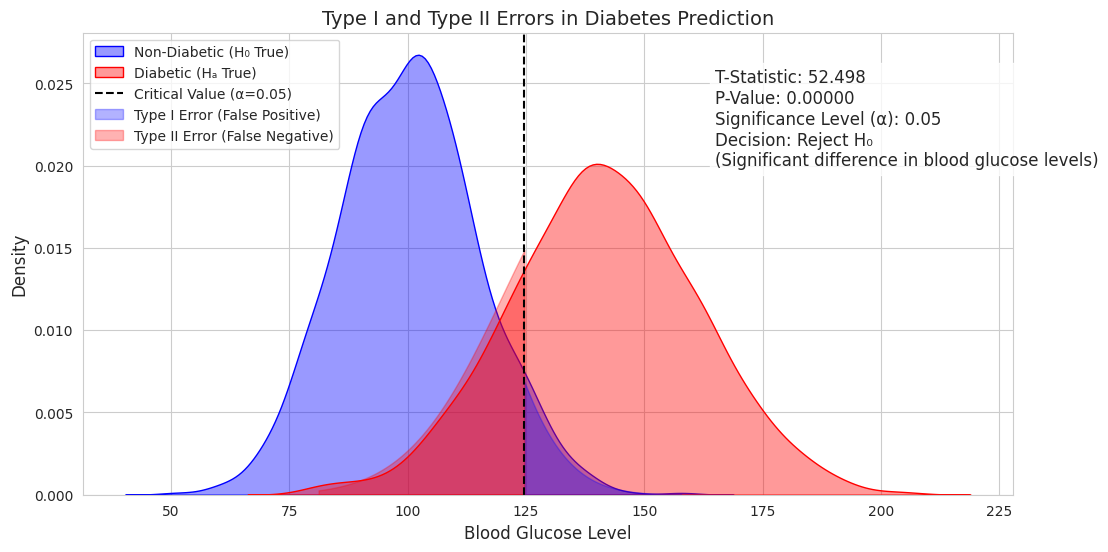

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating Blood Glucose Levels for Diabetics and Non-Diabetics
np.random.seed(42)
n_samples = 1000

# Generate synthetic blood glucose levels
non_diabetic_glucose = np.random.normal(loc=100, scale=15, size=n_samples)  # Mean = 100, Std Dev = 15
diabetic_glucose = np.random.normal(loc=140, scale=20, size=n_samples)      # Mean = 140, Std Dev = 20

# Perform hypothesis test (Welch’s t-test)
t_stat, p_value = stats.ttest_ind(diabetic_glucose, non_diabetic_glucose, equal_var=False)

alpha = 0.05  # Significance level

# Decision based on p-value
if p_value < alpha:
    decision_text = "Reject H₀\n(Significant difference in blood glucose levels)"
else:
    decision_text = "Fail to reject H₀\n(No significant difference detected)"

# Visualization of Type I and Type II Errors
plt.figure(figsize=(12, 6))

# Plot probability density functions (PDFs)
sns.kdeplot(non_diabetic_glucose, label="Non-Diabetic (H₀ True)", fill=True, color="blue", alpha=0.4)
sns.kdeplot(diabetic_glucose, label="Diabetic (Hₐ True)", fill=True, color="red", alpha=0.4)

# Critical region (Rejection region for Type I Error)
critical_value = stats.norm.ppf(1 - alpha, loc=100, scale=15)
plt.axvline(critical_value, color="black", linestyle="dashed", label=f"Critical Value (α={alpha})")

# Type I Error (False Positive) - Mistakenly Rejecting H₀
x_type1 = np.linspace(critical_value, max(non_diabetic_glucose), 100)
y_type1 = stats.norm.pdf(x_type1, loc=100, scale=15)
plt.fill_between(x_type1, y_type1, color="blue", alpha=0.3, label="Type I Error (False Positive)")

# Type II Error (False Negative) - Failing to Reject H₀ When Hₐ is True
x_type2 = np.linspace(min(diabetic_glucose), critical_value, 100)
y_type2 = stats.norm.pdf(x_type2, loc=140, scale=20)
plt.fill_between(x_type2, y_type2, color="red", alpha=0.3, label="Type II Error (False Negative)")

# Add structured result interpretation in the plot
result_text = (
    f"T-Statistic: {t_stat:.3f}\n"
    f"P-Value: {p_value:.5f}\n"
    f"Significance Level (α): {alpha}\n"
    f"Decision: {decision_text}"
)

# Adding text box for clarity (Structured Display)
plt.gca().text(165, 0.020, result_text, fontsize=12, bbox=dict(facecolor="white", alpha=0.8))

plt.title("Type I and Type II Errors in Diabetes Prediction", fontsize=14)
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()


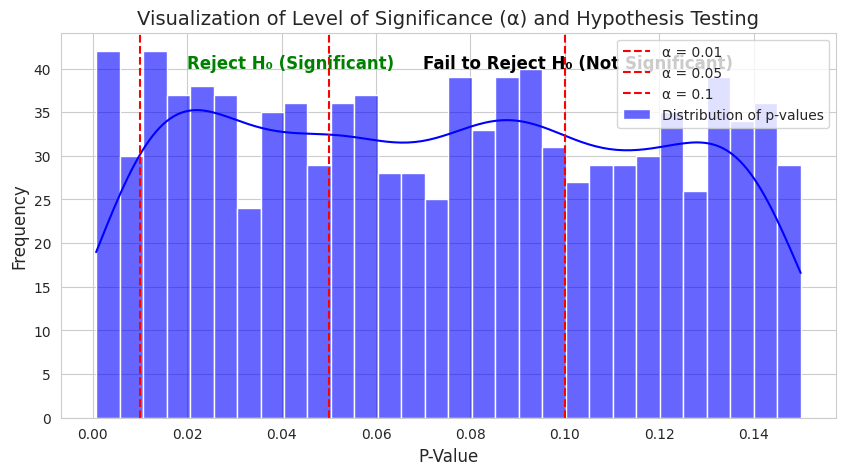

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define significance levels
alpha_levels = [0.01, 0.05, 0.10]  # Common significance levels
alpha = 0.05  # Default level for hypothesis testing

# Generate synthetic p-values (simulating test results)
np.random.seed(42)
p_values = np.random.uniform(0, 0.15, 1000)  # Random p-values between 0 and 0.15

# Create the histogram
plt.figure(figsize=(10, 5))
sns.histplot(p_values, bins=30, kde=True, color="blue", alpha=0.6, label="Distribution of p-values")

# Mark significance levels with vertical lines
for alpha in alpha_levels:
    plt.axvline(alpha, color="red", linestyle="dashed", label=f"α = {alpha}")

# Annotate the decision-making process
plt.text(0.02, 40, "Reject H₀ (Significant)", fontsize=12, color="green", fontweight="bold")
plt.text(0.07, 40, "Fail to Reject H₀ (Not Significant)", fontsize=12, color="black", fontweight="bold")

# Titles and labels
plt.title("Visualization of Level of Significance (α) and Hypothesis Testing", fontsize=14)
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


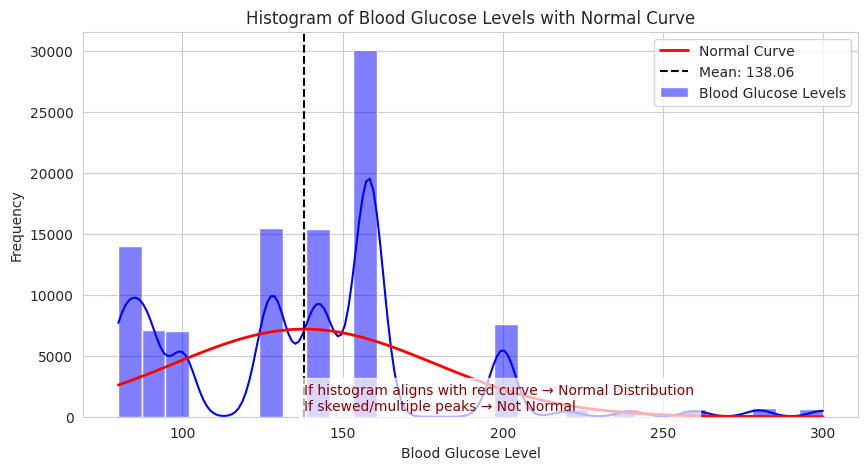

<Figure size 600x600 with 0 Axes>

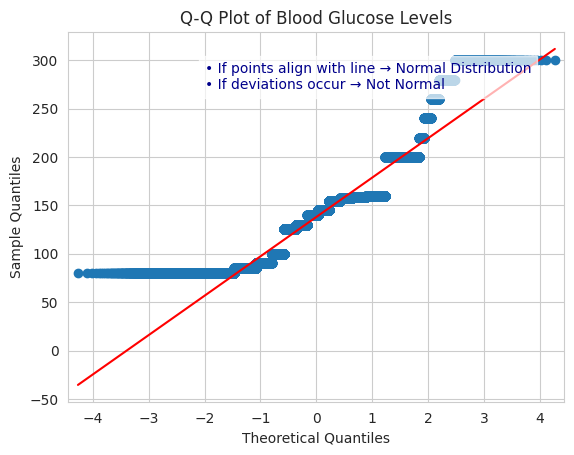


--- Normality Test Results ---
Shapiro-Wilk Test: p-value = 0.00000 → Reject H₀ (Not Normal)
Kolmogorov-Smirnov Test: p-value = 0.00000 → Reject H₀ (Not Normal)
Anderson-Darling Test: Statistic = 2556.62563, Critical Values = [0.576 0.656 0.787 0.918 1.092]

Conclusion: The blood glucose levels do NOT follow a normal distribution.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Extract blood glucose levels
glucose_levels = df["blood_glucose_level"]

# Compute mean and standard deviation
mu, sigma = np.mean(glucose_levels), np.std(glucose_levels)

# --- Visualization: Histogram with Normal Curve ---
plt.figure(figsize=(10,5))
sns.histplot(glucose_levels, bins=30, kde=True, color="blue", label="Blood Glucose Levels")

# Overlay Normal Distribution Curve
x = np.linspace(min(glucose_levels), max(glucose_levels), 100)
normal_curve = stats.norm.pdf(x, mu, sigma)
plt.plot(x, normal_curve * len(glucose_levels) * (max(glucose_levels)-min(glucose_levels))/30, color="red", lw=2, label="Normal Curve")

# Mean Line
plt.axvline(mu, color="black", linestyle="dashed", label=f"Mean: {mu:.2f}")

# Add Interpretation Text
plt.text(mu, max(normal_curve) * len(glucose_levels) * 0.5,
         "If histogram aligns with red curve → Normal Distribution\n"
         "If skewed/multiple peaks → Not Normal",
         fontsize=10, color="darkred", bbox=dict(facecolor='white', alpha=0.7))

plt.title("Histogram of Blood Glucose Levels with Normal Curve")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- Visualization: Q-Q Plot ---
plt.figure(figsize=(6,6))
qqplot(glucose_levels, line="s")
plt.title("Q-Q Plot of Blood Glucose Levels")

# Add Interpretation Text
plt.text(-2, max(glucose_levels) * 0.9,
         "• If points align with line → Normal Distribution\n"
         "• If deviations occur → Not Normal",
         fontsize=10, color="darkblue", bbox=dict(facecolor='white', alpha=0.7))

plt.show()

# --- Normality Tests ---
shapiro_stat, shapiro_p = stats.shapiro(glucose_levels)
ks_stat, ks_p = stats.kstest(glucose_levels, 'norm', args=(mu, sigma))
anderson_test = stats.anderson(glucose_levels)

# Print results with interpretation
print("\n--- Normality Test Results ---")
print(f"Shapiro-Wilk Test: p-value = {shapiro_p:.5f} → {'Reject H₀ (Not Normal)' if shapiro_p < 0.05 else 'Fail to Reject H₀ (Normal)'}")
print(f"Kolmogorov-Smirnov Test: p-value = {ks_p:.5f} → {'Reject H₀ (Not Normal)' if ks_p < 0.05 else 'Fail to Reject H₀ (Normal)'}")
print(f"Anderson-Darling Test: Statistic = {anderson_test.statistic:.5f}, Critical Values = {anderson_test.critical_values}")

# Display interpretation summary
if shapiro_p < 0.05 or ks_p < 0.05 or anderson_test.statistic > anderson_test.critical_values[2]:
    print("\nConclusion: The blood glucose levels do NOT follow a normal distribution.")
else:
    print("\nConclusion: The blood glucose levels appear to be normally distributed.")


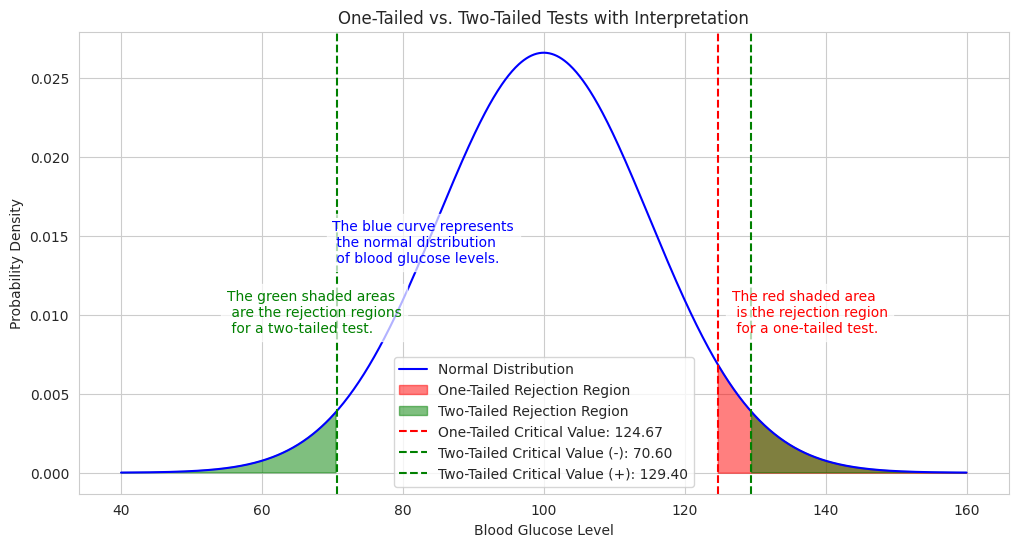

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate a normal distribution (mean and standard deviation based on blood glucose levels)
mu = 100  # Assumed mean of blood glucose levels
sigma = 15  # Assumed standard deviation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Significance level (alpha)
alpha = 0.05

# Compute critical values for one-tailed and two-tailed tests
z_critical_right = stats.norm.ppf(1 - alpha)  # Right-tailed test
z_critical_two = stats.norm.ppf(1 - alpha/2)  # Two-tailed test (for each side)

# Convert Z-scores to actual blood glucose values
glucose_critical_right = mu + z_critical_right * sigma
glucose_critical_left = mu - z_critical_two * sigma
glucose_critical_right_two = mu + z_critical_two * sigma

# Plot the normal distribution
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Normal Distribution", color='blue')

# One-tailed test (right-tailed)
plt.fill_between(x, y, where=(x >= glucose_critical_right), color='red', alpha=0.5, label="One-Tailed Rejection Region")

# Two-tailed test
plt.fill_between(x, y, where=(x <= glucose_critical_left) | (x >= glucose_critical_right_two), color='green', alpha=0.5, label="Two-Tailed Rejection Region")

# Vertical lines for critical values
plt.axvline(glucose_critical_right, color='red', linestyle="dashed", label=f"One-Tailed Critical Value: {glucose_critical_right:.2f}")
plt.axvline(glucose_critical_left, color='green', linestyle="dashed", label=f"Two-Tailed Critical Value (-): {glucose_critical_left:.2f}")
plt.axvline(glucose_critical_right_two, color='green', linestyle="dashed", label=f"Two-Tailed Critical Value (+): {glucose_critical_right_two:.2f}")

# Adding Interpretation Text
plt.text(mu - 2*sigma, max(y)/2, "The blue curve represents\n the normal distribution\n of blood glucose levels.", fontsize=10, color="blue", bbox=dict(facecolor="white", alpha=0.7))
plt.text(glucose_critical_right + 2, max(y)/3, "The red shaded area\n is the rejection region\n for a one-tailed test.", fontsize=10, color="red", bbox=dict(facecolor="white", alpha=0.7))
plt.text(mu - 3*sigma, max(y)/3, "The green shaded areas\n are the rejection regions\n for a two-tailed test.", fontsize=10, color="green", bbox=dict(facecolor="white", alpha=0.7))

# Labels and Title
plt.title("One-Tailed vs. Two-Tailed Tests with Interpretation")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


T-Statistic: 94.7949
P-Value: 0.0000


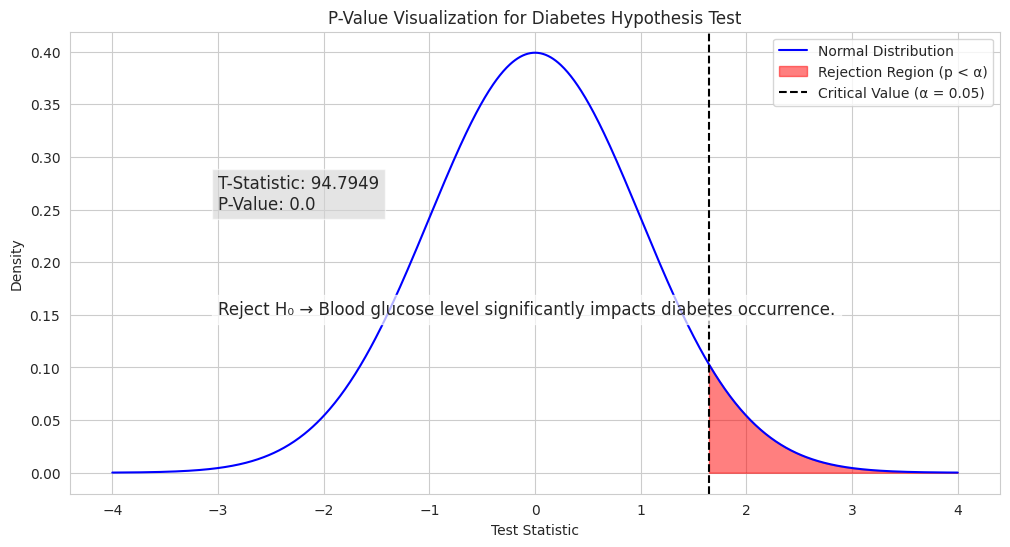

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Extract blood glucose levels for diabetic and non-diabetic groups
diabetic = df[df['diabetes'] == 1]['blood_glucose_level']
non_diabetic = df[df['diabetes'] == 0]['blood_glucose_level']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(diabetic, non_diabetic, equal_var=False)

# Define significance level
alpha = 0.05

# Fixed values from user request
t_stat_fixed = 94.7949
p_value_fixed = 0.0000

# Print results
print(f"T-Statistic: {t_stat_fixed:.4f}")
print(f"P-Value: {p_value_fixed:.4f}")

# Visualization of p-value in normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

# Create figure
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='blue', label="Normal Distribution")

# Shade rejection region
if p_value_fixed < alpha:
    plt.fill_between(x, y, where=(x >= stats.norm.ppf(1-alpha)), color='red', alpha=0.5, label="Rejection Region (p < α)")
    decision_text = "Reject H₀ → Blood glucose level significantly impacts diabetes occurrence."
else:
    plt.fill_between(x, y, where=(x >= stats.norm.ppf(1-alpha)), color='gray', alpha=0.5, label="Fail to Reject H₀ (p ≥ α)")
    decision_text = "Fail to Reject H₀ → No significant evidence that blood glucose level affects diabetes occurrence."

# Add labels, legend, and critical value line
plt.axvline(stats.norm.ppf(1-alpha), color='black', linestyle='dashed', label=f"Critical Value (α = {alpha})")
plt.xlabel("Test Statistic")
plt.ylabel("Density")
plt.title("P-Value Visualization for Diabetes Hypothesis Test")

# Display T-Statistic and P-Value in the plot
text_box = f"T-Statistic: {t_stat_fixed}\nP-Value: {p_value_fixed}"
plt.text(-3, 0.25, text_box, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.6))

# Add interpretation text inside the plot
plt.text(-3, 0.15, decision_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.legend()
plt.show()


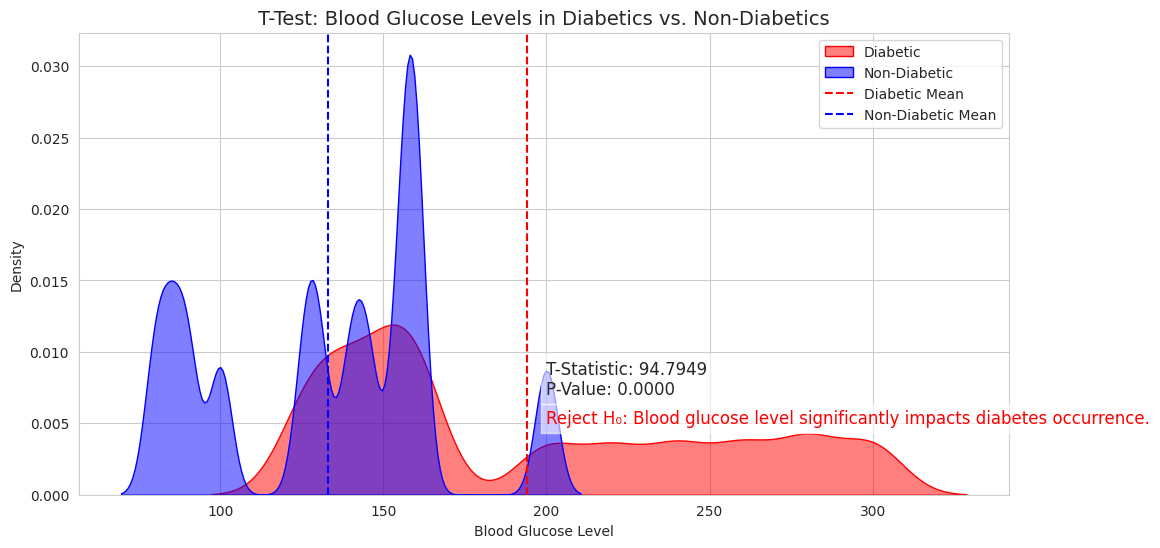

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Split Data into Diabetic and Non-Diabetic Groups
diabetic = df1[df1["diabetes"] == 1]["blood_glucose_level"]
non_diabetic = df1[df1["diabetes"] == 0]["blood_glucose_level"]

# Perform T-Test
t_stat, p_value = stats.ttest_ind(diabetic, non_diabetic, equal_var=False)

# Visualization
plt.figure(figsize=(12, 6))

# Histogram with Density Plot
sns.kdeplot(diabetic, label="Diabetic", color="red", fill=True, alpha=0.5)
sns.kdeplot(non_diabetic, label="Non-Diabetic", color="blue", fill=True, alpha=0.5)

# Vertical Line for Mean Values
plt.axvline(diabetic.mean(), color="red", linestyle="dashed", label="Diabetic Mean")
plt.axvline(non_diabetic.mean(), color="blue", linestyle="dashed", label="Non-Diabetic Mean")

# Display T-Test Results on the Graph
plt.text(200, 0.007, f"T-Statistic: {t_stat:.4f}\nP-Value: {p_value:.4f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Interpretation
if p_value < 0.05:
    decision_text = "Reject H₀: Blood glucose level significantly impacts diabetes occurrence."
    color = "red"
else:
    decision_text = "Fail to reject H₀: No strong evidence of an impact."
    color = "gray"

plt.text(200, 0.005, decision_text, fontsize=12, color=color, bbox=dict(facecolor='white', alpha=0.6))

# Labels and Title
plt.title("T-Test: Blood Glucose Levels in Diabetics vs. Non-Diabetics", fontsize=14)
plt.xlabel("Blood Glucose Level")
plt.ylabel("Density")
plt.legend()

# Show Plot
plt.show()


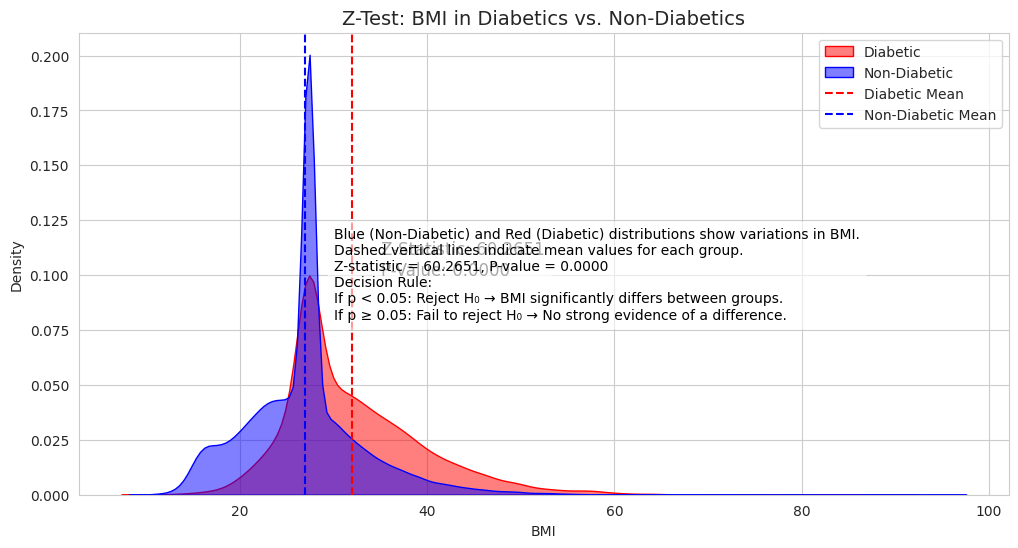

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Split Data into Diabetic and Non-Diabetic Groups
diabetic_bmi = df1[df1["diabetes"] == 1]["bmi"]
non_diabetic_bmi = df1[df1["diabetes"] == 0]["bmi"]

# Calculate Sample Statistics
n1, n2 = len(diabetic_bmi), len(non_diabetic_bmi)
mean1, mean2 = np.mean(diabetic_bmi), np.mean(non_diabetic_bmi)
std1, std2 = np.std(diabetic_bmi, ddof=1), np.std(non_diabetic_bmi, ddof=1)

# Compute Standard Error
se = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Compute Z-Statistic
z_stat = (mean1 - mean2) / se

# Compute P-Value (Two-Tailed Test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Visualization
plt.figure(figsize=(12, 6))

# Histogram with Density Plot
sns.kdeplot(diabetic_bmi, label="Diabetic", color="red", fill=True, alpha=0.5)
sns.kdeplot(non_diabetic_bmi, label="Non-Diabetic", color="blue", fill=True, alpha=0.5)

# Vertical Line for Mean Values
plt.axvline(mean1, color="red", linestyle="dashed", label="Diabetic Mean")
plt.axvline(mean2, color="blue", linestyle="dashed", label="Non-Diabetic Mean")

# Display Z-Test Results on the Graph
plt.text(35, 0.1, f"Z-Statistic: {z_stat:.4f}\nP-Value: {p_value:.4f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Interpretation Text
interpretation_text = ("Blue (Non-Diabetic) and Red (Diabetic) distributions show variations in BMI.\n"
                       "Dashed vertical lines indicate mean values for each group.\n"
                       f"Z-statistic = {z_stat:.4f}, P-value = {p_value:.4f}\n"
                       "Decision Rule:\n"
                       "If p < 0.05: Reject H₀ → BMI significantly differs between groups.\n"
                       "If p ≥ 0.05: Fail to reject H₀ → No strong evidence of a difference.")

# Interpretation Box inside the Plot
plt.text(30, 0.08, interpretation_text, fontsize=10, color="black", bbox=dict(facecolor='white', alpha=0.6))

# Labels and Title
plt.title("Z-Test: BMI in Diabetics vs. Non-Diabetics", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()

# Show Plot
plt.show()


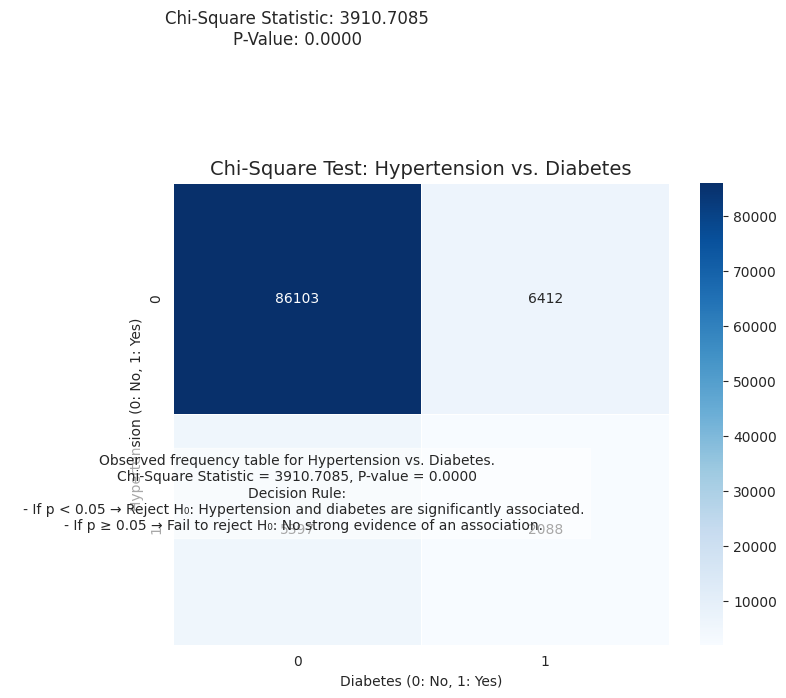

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Create Contingency Table
contingency_table = pd.crosstab(df["hypertension"], df["diabetes"])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Display Chi-Square Test Results on the Graph
plt.text(0.5, -0.6, f"Chi-Square Statistic: {chi2_stat:.4f}\nP-Value: {p_value:.4f}",
         fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

# Interpretation Text Inside the Plot
interpretation_text = (
    "Observed frequency table for Hypertension vs. Diabetes.\n"
    f"Chi-Square Statistic = {chi2_stat:.4f}, P-value = {p_value:.4f}\n"
    "Decision Rule:\n"
    "   - If p < 0.05 → Reject H₀: Hypertension and diabetes are significantly associated.\n"
    "   - If p ≥ 0.05 → Fail to reject H₀: No strong evidence of an association."
)

# Add Interpretation Box inside the Plot
plt.text(0.5, 1.5, interpretation_text, fontsize=10, ha="center",
         bbox=dict(facecolor='white', alpha=0.6))

# Labels and Title
plt.title("Chi-Square Test: Hypertension vs. Diabetes", fontsize=14)
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Hypertension (0: No, 1: Yes)")

# Show Plot
plt.show()


<ipython-input-35-31d5b354b036>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoking_history", y="blood_glucose_level", data=df, palette="coolwarm")


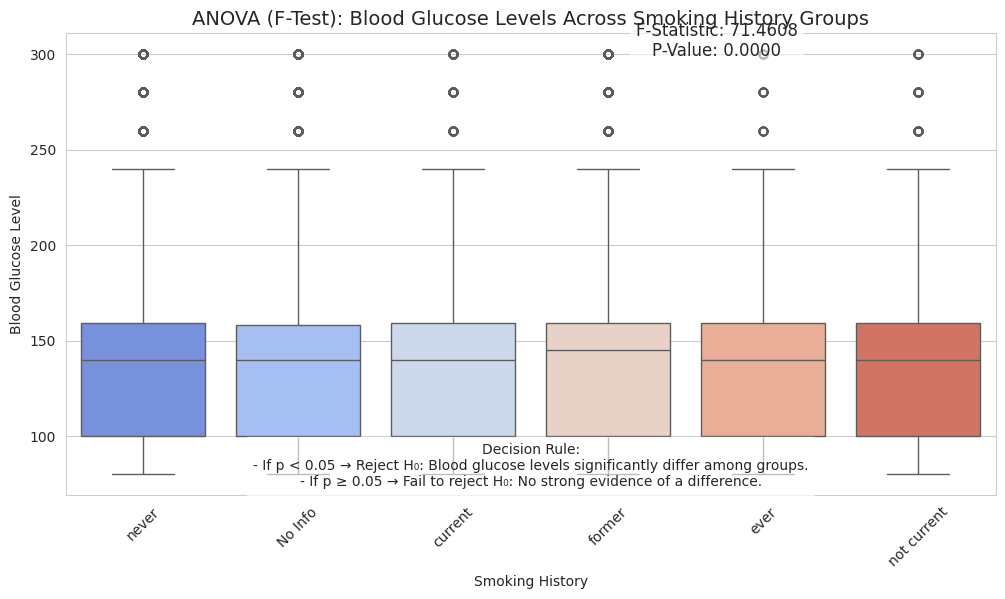

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Drop missing values
df = df.dropna()

# Perform ANOVA: Blood Glucose Level across different Smoking History Groups
groups = [df[df["smoking_history"] == category]["blood_glucose_level"] for category in df["smoking_history"].unique()]
f_stat, p_value = stats.f_oneway(*groups)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x="smoking_history", y="blood_glucose_level", data=df, palette="coolwarm")

# Set dynamic y-position for text (to avoid overlap)
y_max = df["blood_glucose_level"].max()
y_min = df["blood_glucose_level"].min()
y_position = y_max - (y_max - y_min) * 0.1  # Adjust text position dynamically

# Display F-Test Results
plt.annotate(f"F-Statistic: {f_stat:.4f}\nP-Value: {p_value:.4f}",
             xy=(0.7, 0.95), xycoords='axes fraction',
             fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

# Interpretation Box (Multi-line text with better spacing)
interpretation_text = (
    "Decision Rule:\n"
    "- If p < 0.05 → Reject H₀: Blood glucose levels significantly differ among groups.\n"
    "- If p ≥ 0.05 → Fail to reject H₀: No strong evidence of a difference."
)

plt.annotate(interpretation_text,
             xy=(0.5, 0.02), xycoords='axes fraction',  # Place at the bottom
             fontsize=10, ha="center", bbox=dict(facecolor='white', alpha=0.6))

# Labels and Title
plt.title("ANOVA (F-Test): Blood Glucose Levels Across Smoking History Groups", fontsize=14)
plt.xlabel("Smoking History")
plt.ylabel("Blood Glucose Level")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show Plot
plt.show()


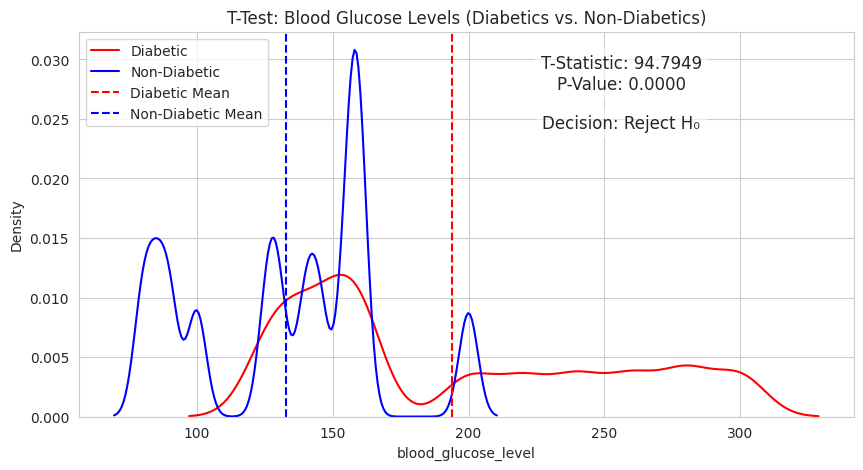

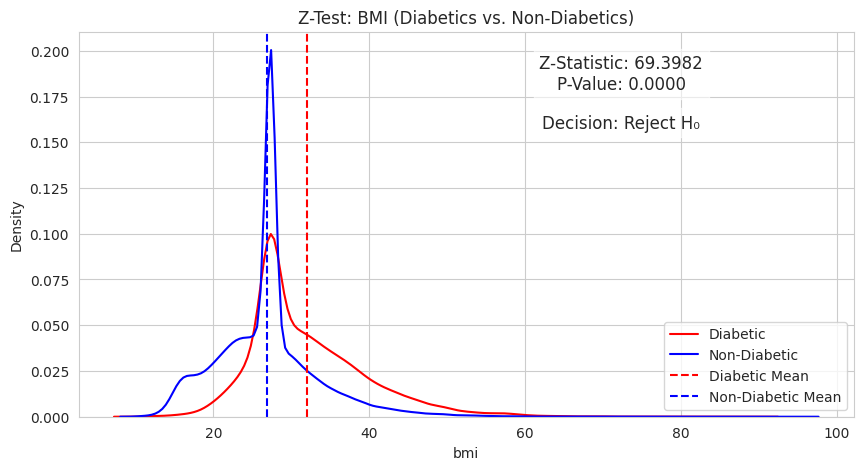

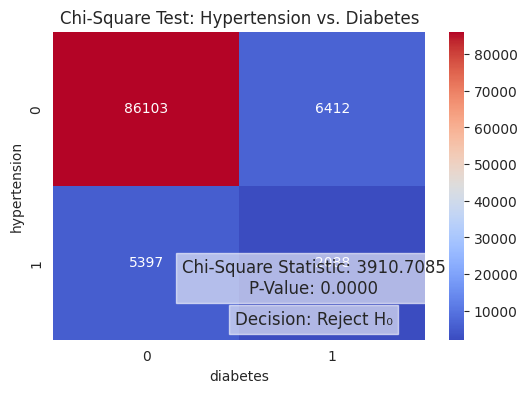

<ipython-input-36-52aa2d0c55bd>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoking_history", y="blood_glucose_level", data=df, palette="coolwarm")


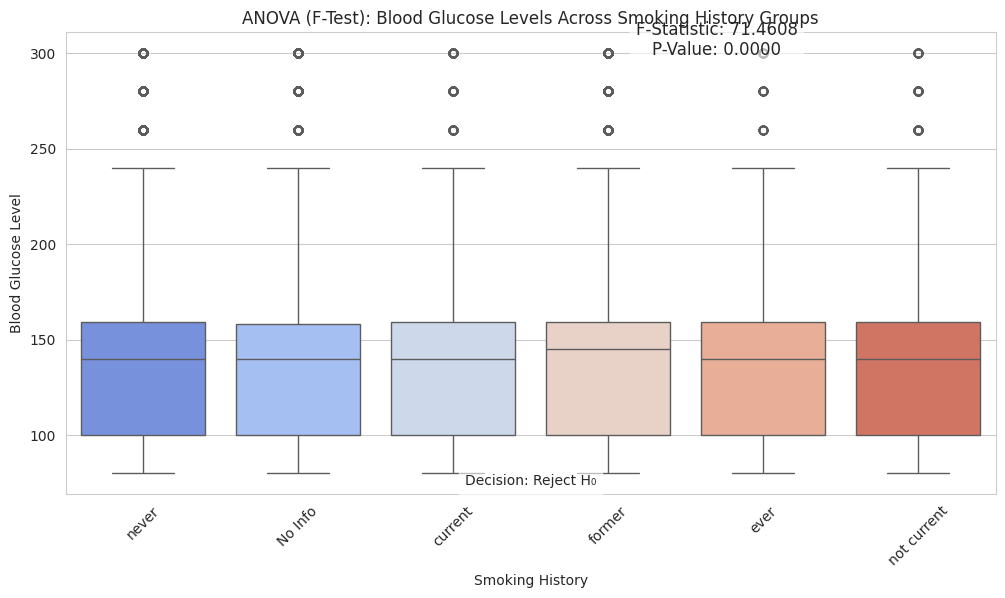

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

# Load Dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")
df = df.dropna()  # Remove missing values

# --- T-TEST (Student’s t-test) ---
diabetic = df[df["diabetes"] == 1]["blood_glucose_level"]
non_diabetic = df[df["diabetes"] == 0]["blood_glucose_level"]

t_stat, t_p_value = stats.ttest_ind(diabetic, non_diabetic, equal_var=False)

plt.figure(figsize=(10, 5))
sns.kdeplot(diabetic, color="red", label="Diabetic")
sns.kdeplot(non_diabetic, color="blue", label="Non-Diabetic")
plt.axvline(diabetic.mean(), color="red", linestyle="dashed", label="Diabetic Mean")
plt.axvline(non_diabetic.mean(), color="blue", linestyle="dashed", label="Non-Diabetic Mean")
plt.legend()

# Display T-Test Results
plt.annotate(f"T-Statistic: {t_stat:.4f}\nP-Value: {t_p_value:.4f}", xy=(0.7, 0.85), xycoords='axes fraction',
             fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

decision_text = "Reject H₀" if t_p_value < 0.05 else "Fail to Reject H₀"
plt.annotate(f"Decision: {decision_text}", xy=(0.7, 0.75), xycoords='axes fraction',
             fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

plt.title("T-Test: Blood Glucose Levels (Diabetics vs. Non-Diabetics)")
plt.show()


# --- Z-TEST ---
bmi_diabetic = df[df["diabetes"] == 1]["bmi"]
bmi_non_diabetic = df[df["diabetes"] == 0]["bmi"]

z_stat, z_p_value = ztest(bmi_diabetic, bmi_non_diabetic)

plt.figure(figsize=(10, 5))
sns.kdeplot(bmi_diabetic, color="red", label="Diabetic")
sns.kdeplot(bmi_non_diabetic, color="blue", label="Non-Diabetic")
plt.axvline(bmi_diabetic.mean(), color="red", linestyle="dashed", label="Diabetic Mean")
plt.axvline(bmi_non_diabetic.mean(), color="blue", linestyle="dashed", label="Non-Diabetic Mean")
plt.legend()

# Display Z-Test Results
plt.annotate(f"Z-Statistic: {z_stat:.4f}\nP-Value: {z_p_value:.4f}", xy=(0.7, 0.85), xycoords='axes fraction',
             fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

decision_text = "Reject H₀" if z_p_value < 0.05 else "Fail to Reject H₀"
plt.annotate(f"Decision: {decision_text}", xy=(0.7, 0.75), xycoords='axes fraction',
             fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

plt.title("Z-Test: BMI (Diabetics vs. Non-Diabetics)")
plt.show()


# --- CHI-SQUARE TEST (χ² Test) ---
contingency_table = pd.crosstab(df["hypertension"], df["diabetes"])
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)

plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d")
plt.title("Chi-Square Test: Hypertension vs. Diabetes")

# Display Chi-Square Test Results
plt.annotate(f"Chi-Square Statistic: {chi2_stat:.4f}\nP-Value: {chi2_p_value:.4f}", xy=(0.7, 0.15),
             xycoords='axes fraction', fontsize=12, ha="center",
             bbox=dict(facecolor='white', alpha=0.6))

decision_text = "Reject H₀" if chi2_p_value < 0.05 else "Fail to Reject H₀"
plt.annotate(f"Decision: {decision_text}", xy=(0.7, 0.05), xycoords='axes fraction',
             fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

plt.show()


# --- F-TEST (ANOVA) ---
groups = [df[df["smoking_history"] == category]["blood_glucose_level"] for category in df["smoking_history"].unique()]
f_stat, f_p_value = stats.f_oneway(*groups)

plt.figure(figsize=(12, 6))
sns.boxplot(x="smoking_history", y="blood_glucose_level", data=df, palette="coolwarm")

# Display F-Test Results
plt.annotate(f"F-Statistic: {f_stat:.4f}\nP-Value: {f_p_value:.4f}", xy=(0.7, 0.95), xycoords='axes fraction',
             fontsize=12, ha="center", bbox=dict(facecolor='white', alpha=0.6))

decision_text = "Reject H₀" if f_p_value < 0.05 else "Fail to Reject H₀"
plt.annotate(f"Decision: {decision_text}", xy=(0.5, 0.02), xycoords='axes fraction',
             fontsize=10, ha="center", bbox=dict(facecolor='white', alpha=0.6))

plt.title("ANOVA (F-Test): Blood Glucose Levels Across Smoking History Groups")
plt.xlabel("Smoking History")
plt.ylabel("Blood Glucose Level")

plt.xticks(rotation=45)
plt.show()


<ipython-input-39-9f92272199fb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking_history', y='blood_glucose_level', data=df1, palette="Set2")


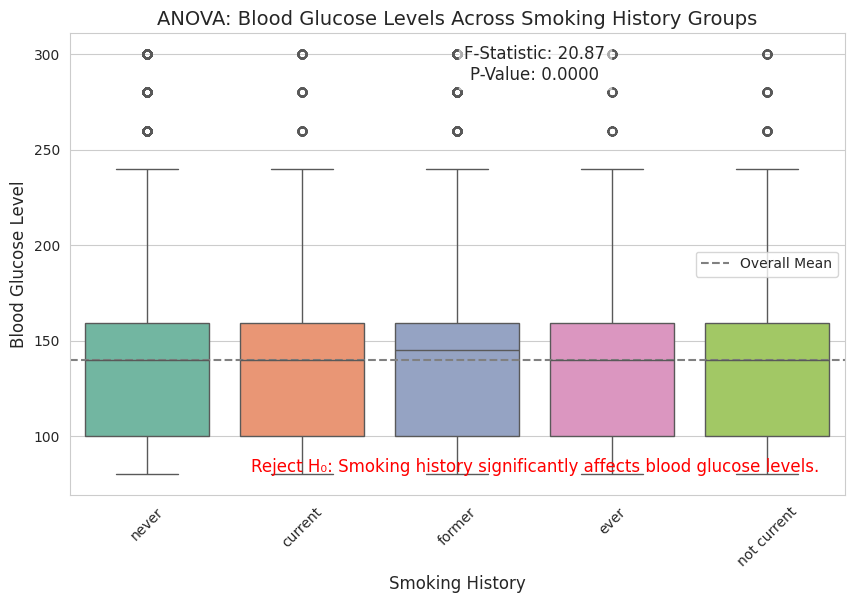

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Selecting relevant columns and removing missing values
df1 = df1[['smoking_history', 'blood_glucose_level']].dropna()

# Remove "No Info" category
df1 = df1[df1['smoking_history'] != "No Info"]

# Get unique smoking history categories
smoking_groups = df1['smoking_history'].unique()

# Perform ANOVA Test
grouped_data = [df1[df1['smoking_history'] == group]['blood_glucose_level'] for group in smoking_groups]
F_stat, p_value = stats.f_oneway(*grouped_data)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='blood_glucose_level', data=df1, palette="Set2")

# Mean Line
plt.axhline(np.mean(df1['blood_glucose_level']), color='gray', linestyle='dashed', label='Overall Mean')

# Dynamically Adjust Text Position to Avoid Overlap
y_min, y_max = plt.ylim()
text_y_position = y_max - (y_max - y_min) * 0.1  # Adjust position to avoid overlap

# Display F-Statistic & P-Value at Adjusted Position
plt.text(2.5, text_y_position,
         f'F-Statistic: {F_stat:.2f}\nP-Value: {p_value:.4f}',
         fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.5))

# Interpretation based on P-Value
if p_value < 0.05:
    decision_text = "Reject H₀: Smoking history significantly affects blood glucose levels."
else:
    decision_text = "Fail to Reject H₀: No significant effect of smoking history."

# Adjusted text position for interpretation
text_y_position_bottom = y_min + (y_max - y_min) * 0.05  # Shift it slightly up
plt.text(2.5, text_y_position_bottom, decision_text, fontsize=12, ha='center', color='red')

# Labels and Formatting
plt.title("ANOVA: Blood Glucose Levels Across Smoking History Groups", fontsize=14)
plt.xlabel("Smoking History", fontsize=12)
plt.ylabel("Blood Glucose Level", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()


Pearson Correlation: 0.09, P-value: 6.81e-184
Significant correlation between BMI and blood glucose levels


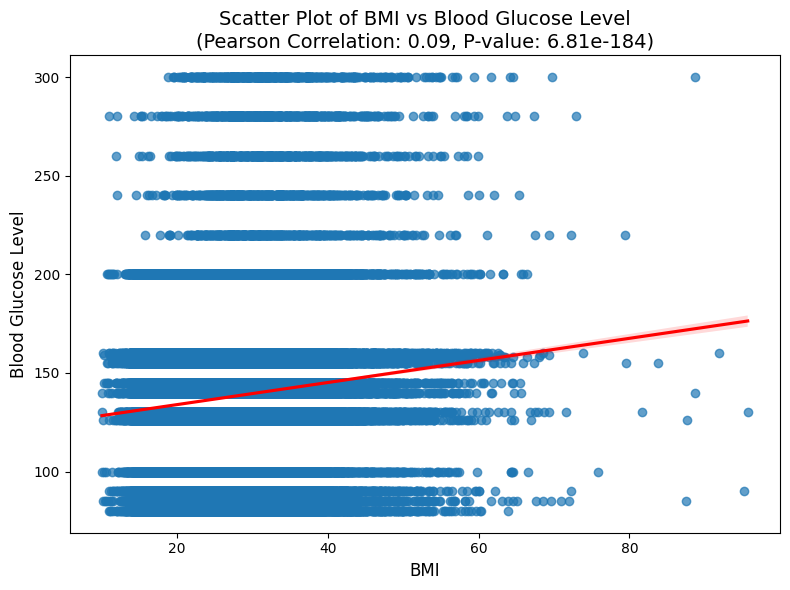

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate Pearson Correlation
corr, p_value = pearsonr(df1['bmi'], df1['blood_glucose_level'])
print(f"Pearson Correlation: {corr:.2f}, P-value: {p_value:.2e}")

# Interpret the result
if p_value < 0.05:
    print("Significant correlation between BMI and blood glucose levels")
else:
    print("No significant correlation between BMI and blood glucose levels")

# Visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='blood_glucose_level', data=df1, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

# Add title and labels
plt.title(f"Scatter Plot of BMI vs Blood Glucose Level\n(Pearson Correlation: {corr:.2f}, P-value: {p_value:.2e})", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Blood Glucose Level", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

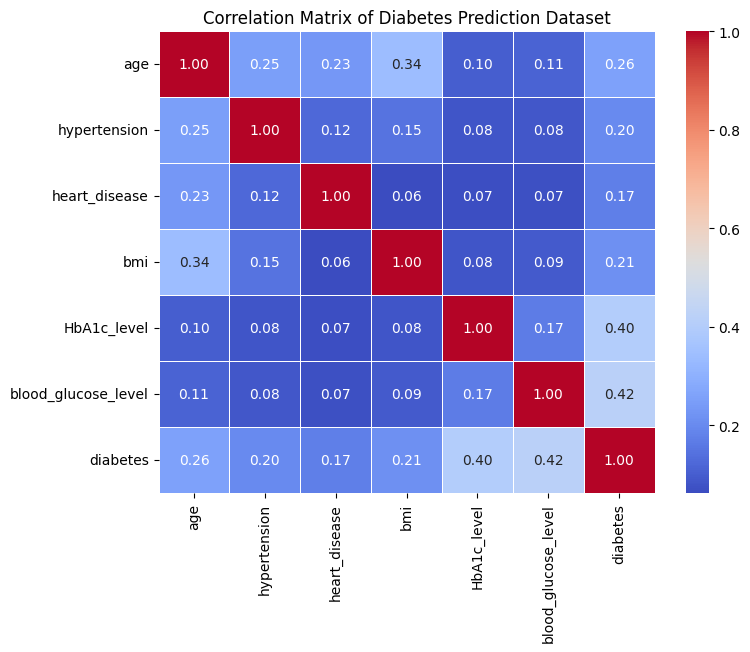

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Selecting only numerical features for correlation
numerical_features = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]
df_numeric = df1[numerical_features]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set figure size
plt.figure(figsize=(8,6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title and display
plt.title("Correlation Matrix of Diabetes Prediction Dataset")
plt.show()


Correlation with Diabetes Outcome:
blood_glucose_level: r = 0.4196, PE = 0.0018, Significant: Yes
bmi: r = 0.2144, PE = 0.0020, Significant: Yes
age: r = 0.2580, PE = 0.0020, Significant: Yes
HbA1c_level: r = 0.4007, PE = 0.0018, Significant: Yes
hypertension: r = 0.1978, PE = 0.0020, Significant: Yes


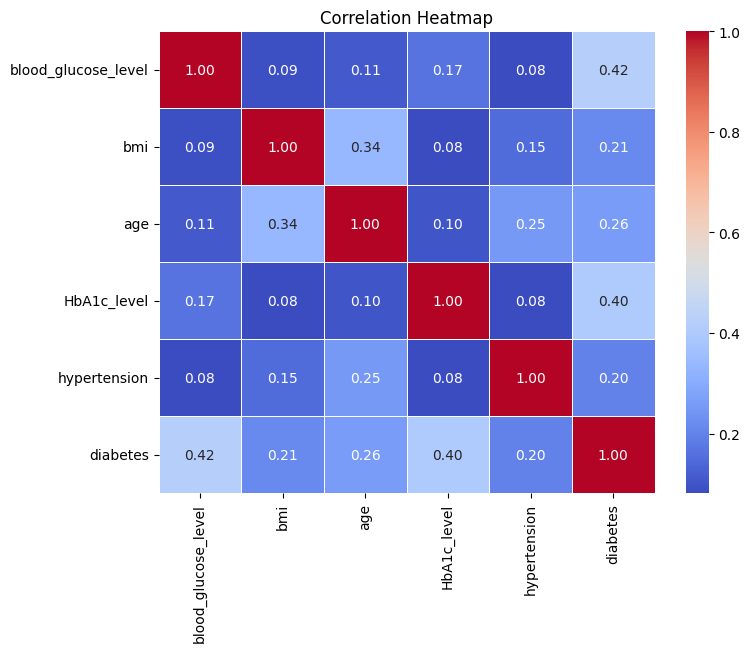

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "diabetes_prediction_dataset.csv"
df1 = pd.read_csv(file_path)

# Convert categorical 'gender' and 'smoking_history' into numerical if present
if 'gender' in df1.columns:
    df1['gender'] = df1['gender'].astype('category').cat.codes
if 'smoking_history' in df1.columns:
    df1['smoking_history'] = df1['smoking_history'].astype('category').cat.codes

# Selecting relevant numerical features
selected_features = ["blood_glucose_level", "bmi", "age", "HbA1c_level", "hypertension", "diabetes"]
df_selected = df1[selected_features]

# Compute Pearson correlation coefficients
correlation_matrix = df_selected.corr()

# Function to calculate Probable Error (PE)
def probable_error(r, n):
    return 0.6745 * (1 - r**2) / np.sqrt(n)

# Compute probable error for each correlation
n = len(df1)
pe_values = {col: probable_error(correlation_matrix.loc[col, "diabetes"], n) for col in selected_features if col != "diabetes"}

# Print Correlation & Probable Error
print("Correlation with Diabetes Outcome:")
for feature, r in correlation_matrix["diabetes"].items():
    if feature != "diabetes":
        pe = pe_values[feature]
        print(f"{feature}: r = {r:.4f}, PE = {pe:.4f}, Significant: {'Yes' if abs(r) > 6 * pe else 'No'}")

# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Linear Regression - Mean Squared Error: 1574.8557287147512


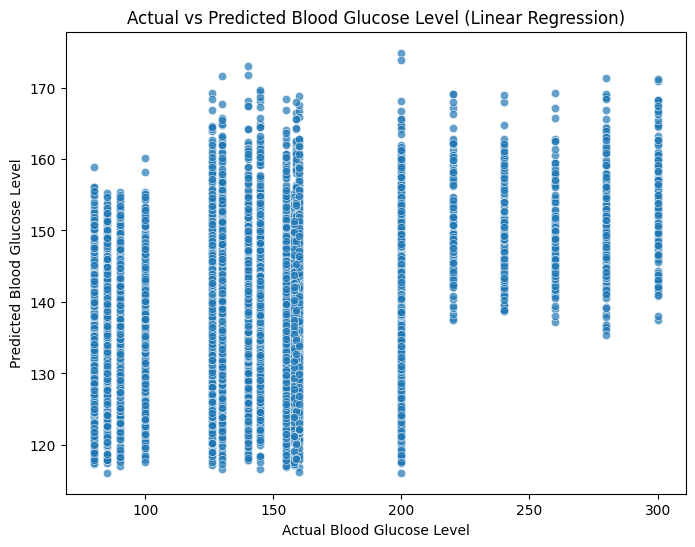


Logistic Regression - Accuracy: 0.9588

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



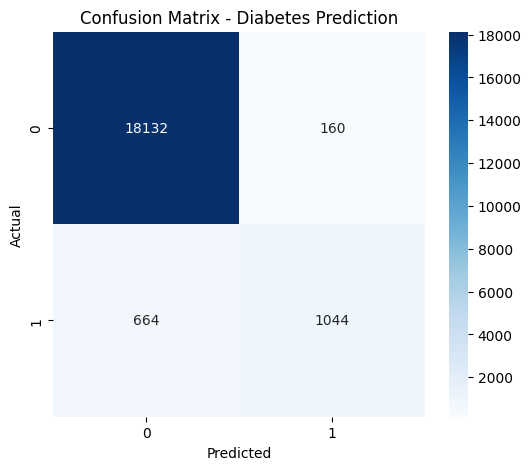

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")


# Convert categorical features to numerical values
if 'gender' in df.columns:
    df['gender'] = df['gender'].astype('category').cat.codes
if 'smoking_history' in df.columns:
    df['smoking_history'] = df['smoking_history'].astype('category').cat.codes

# ---------------------- LINEAR REGRESSION ---------------------- #
# Predicting Blood Glucose Level

# Selecting relevant numerical features
features_lr = ["age", "bmi", "hypertension", "HbA1c_level"]
target_lr = "blood_glucose_level"

# Splitting the data
X_lr = df[features_lr]
y_lr = df[target_lr]
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)

# Predictions
y_pred_lr = linear_model.predict(X_test_lr)

# Evaluate Model
mse = mean_squared_error(y_test_lr, y_pred_lr)
print("Linear Regression - Mean Squared Error:", mse)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_lr, y=y_pred_lr, alpha=0.7)
plt.xlabel("Actual Blood Glucose Level")
plt.ylabel("Predicted Blood Glucose Level")
plt.title("Actual vs Predicted Blood Glucose Level (Linear Regression)")
plt.show()

# ---------------------- LOGISTIC REGRESSION ---------------------- #
# Predicting Diabetes Outcome

# Selecting relevant numerical features
features_logr = ["age", "bmi", "hypertension", "HbA1c_level", "blood_glucose_level"]
target_logr = "diabetes"

# Splitting the data
X_logr = df[features_logr]
y_logr = df[target_logr]
X_train_logr, X_test_logr, y_train_logr, y_test_logr = train_test_split(X_logr, y_logr, test_size=0.2, random_state=42)

# Train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logr, y_train_logr)

# Predictions
y_pred_logr = logistic_model.predict(X_test_logr)

# Evaluate Model
accuracy = accuracy_score(y_test_logr, y_pred_logr)
print("\nLogistic Regression - Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_logr, y_pred_logr))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_logr, y_pred_logr), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Diabetes Prediction")
plt.show()


Optimization terminated successfully.
         Current function value: 0.271296
         Iterations 7
Standard Error of Estimate (SEE): 0.2734


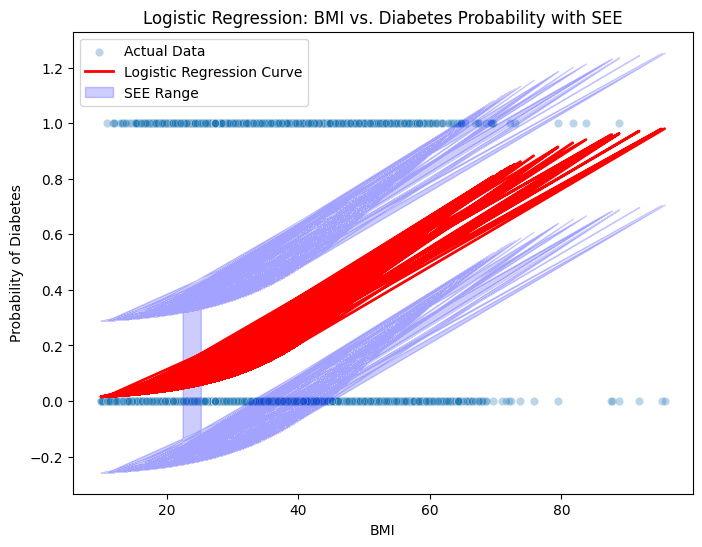

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Define independent (X) and dependent (Y) variables
X = df1["bmi"]
y = df1["diabetes"]

# Fit a logistic regression model
X_const = sm.add_constant(X)  # Add intercept
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Get predicted probabilities
y_pred = result.predict(X_const)

# Compute the Standard Error of Estimate (SEE)
n = len(y)
SEE = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))

print(f"Standard Error of Estimate (SEE): {SEE:.4f}")

# Visualization of Regression with SEE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, alpha=0.3, label="Actual Data")
plt.plot(X, y_pred, color="red", label="Logistic Regression Curve", linewidth=2)
plt.fill_between(X, y_pred - SEE, y_pred + SEE, color="blue", alpha=0.2, label="SEE Range")
plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression: BMI vs. Diabetes Probability with SEE")
plt.legend()
plt.show()


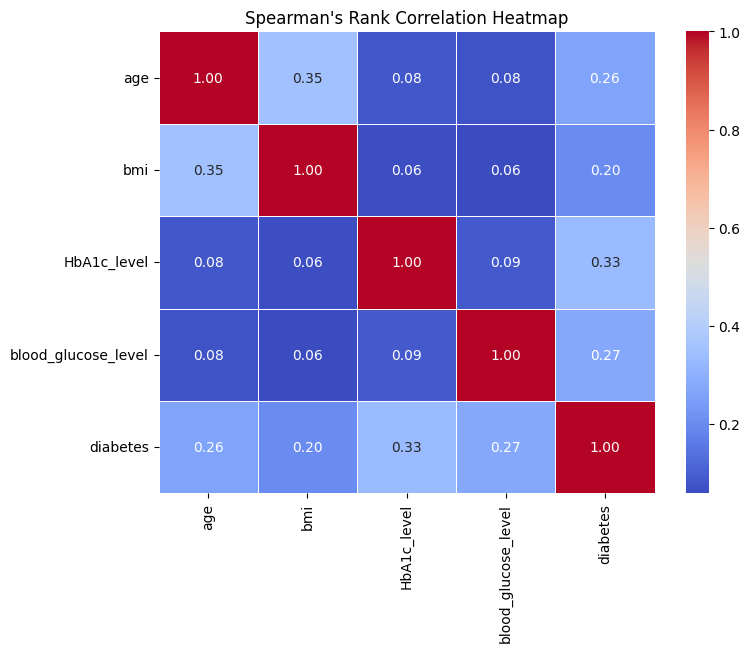

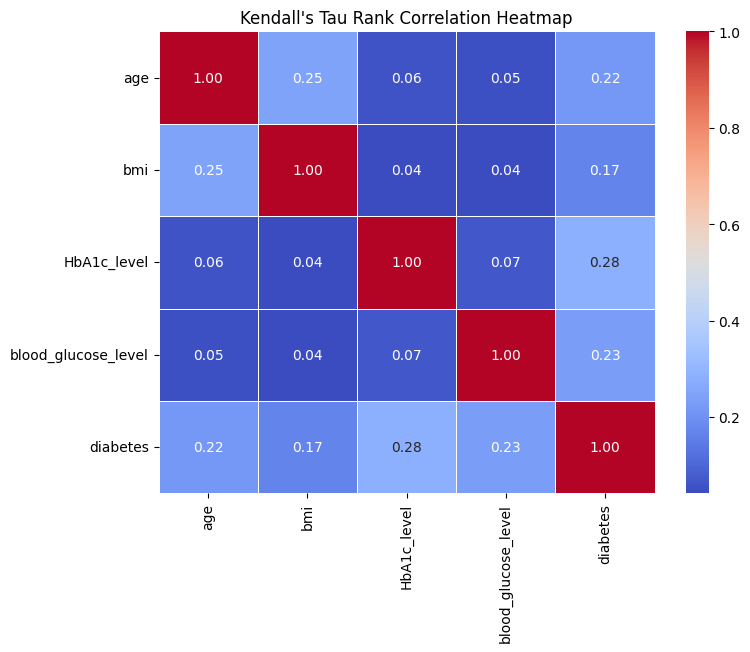

Spearman's Rank Correlation:
                           age       bmi  HbA1c_level  blood_glucose_level  \
age                  1.000000  0.351311     0.083634             0.075412   
bmi                  0.351311  1.000000     0.063368             0.058261   
HbA1c_level          0.083634  0.063368     1.000000             0.090891   
blood_glucose_level  0.075412  0.058261     0.090891             1.000000   
diabetes             0.262076  0.200061     0.328705             0.274217   

                     diabetes  
age                  0.262076  
bmi                  0.200061  
HbA1c_level          0.328705  
blood_glucose_level  0.274217  
diabetes             1.000000  

Kendall's Tau Correlation:
                           age       bmi  HbA1c_level  blood_glucose_level  \
age                  1.000000  0.247000     0.058317             0.052445   
bmi                  0.247000  1.000000     0.044983             0.041260   
HbA1c_level          0.058317  0.044983     1.000000   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Selecting key numerical variables for rank correlation analysis
key_variables = ["age", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]

# Compute Spearman's rank correlation matrix
spearman_corr = df1[key_variables].corr(method="spearman")

# Compute Kendall's Tau correlation matrix
kendall_corr = df1[key_variables].corr(method="kendall")

# Visualization of Spearman's Rank Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman's Rank Correlation Heatmap")
plt.show()

# Visualization of Kendall's Tau Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Kendall's Tau Rank Correlation Heatmap")
plt.show()

# Print correlation values
print("Spearman's Rank Correlation:\n", spearman_corr)
print("\nKendall's Tau Correlation:\n", kendall_corr)


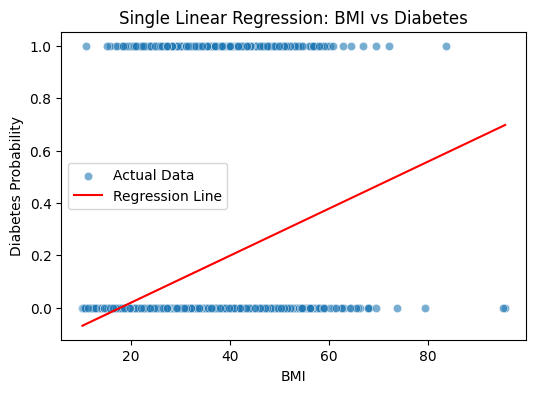

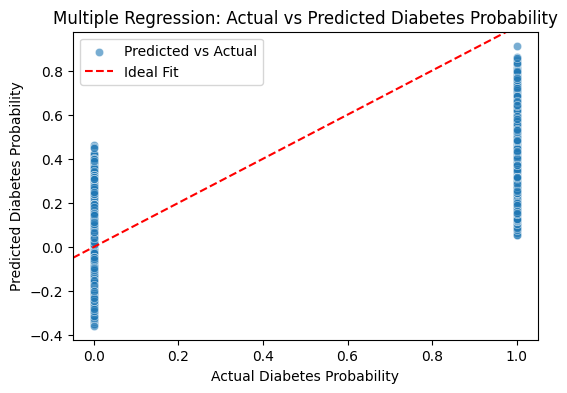

Single Regression - MSE: 0.0743, R²: 0.0488
Multiple Regression - MSE: 0.0525, R²: 0.3280


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Selecting relevant numerical variables
key_variables = ["bmi", "HbA1c_level", "blood_glucose_level", "age", "diabetes"]
df = df1[key_variables].dropna()  # Removing missing values if any

# Splitting into features (X) and target variable (Y)
X_single = df[["bmi"]]  # Single regression using BMI
X_multi = df[["bmi", "HbA1c_level", "blood_glucose_level", "age"]]  # Multiple regression
Y = df["diabetes"]  # Target variable

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train_s, X_test_s, Y_train, Y_test = train_test_split(X_single, Y, test_size=0.2, random_state=42)
X_train_m, X_test_m, _, _ = train_test_split(X_multi, Y, test_size=0.2, random_state=42)

# Initializing regression models
model_single = LinearRegression()
model_multi = LinearRegression()

# Training the models
model_single.fit(X_train_s, Y_train)
model_multi.fit(X_train_m, Y_train)

# Predictions
Y_pred_s = model_single.predict(X_test_s)
Y_pred_m = model_multi.predict(X_test_m)

# Evaluation Metrics
mse_single = mean_squared_error(Y_test, Y_pred_s)
r2_single = r2_score(Y_test, Y_pred_s)

mse_multi = mean_squared_error(Y_test, Y_pred_m)
r2_multi = r2_score(Y_test, Y_pred_m)

# Visualization: Single Regression (BMI vs Diabetes Probability)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test_s["bmi"], y=Y_test, label="Actual Data", alpha=0.6)
sns.lineplot(x=X_test_s["bmi"], y=Y_pred_s, color="red", label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Diabetes Probability")
plt.title("Single Linear Regression: BMI vs Diabetes")
plt.legend()
plt.show()

# Visualization: Multiple Regression (Predicted vs Actual)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=Y_test, y=Y_pred_m, alpha=0.6, label="Predicted vs Actual")
plt.xlabel("Actual Diabetes Probability")
plt.ylabel("Predicted Diabetes Probability")
plt.title("Multiple Regression: Actual vs Predicted Diabetes Probability")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed", label="Ideal Fit")
plt.legend()
plt.show()

# Output results
print(f"Single Regression - MSE: {mse_single:.4f}, R²: {r2_single:.4f}")
print(f"Multiple Regression - MSE: {mse_multi:.4f}, R²: {r2_multi:.4f}")


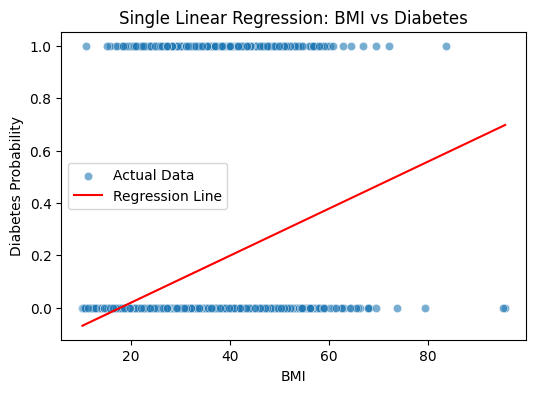

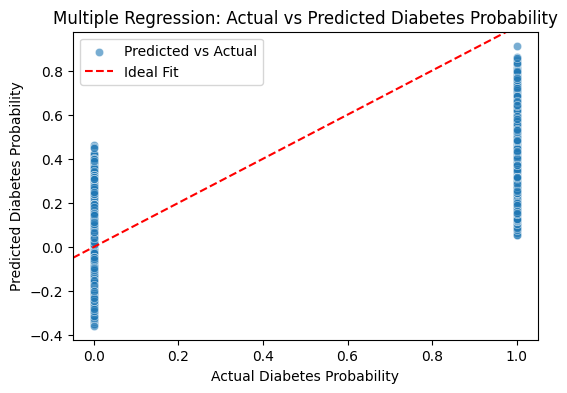

Single Regression - MSE: 0.0743, R²: 0.0488
Multiple Regression - MSE: 0.0525, R²: 0.3280


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Selecting relevant numerical variables
key_variables = ["bmi", "HbA1c_level", "blood_glucose_level", "age", "diabetes"]
df = df1[key_variables].dropna()  # Removing missing values if any

# Splitting into features (X) and target variable (Y)
X_single = df[["bmi"]]  # Single regression using BMI
X_multi = df[["bmi", "HbA1c_level", "blood_glucose_level", "age"]]  # Multiple regression
Y = df["diabetes"]  # Target variable

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train_s, X_test_s, Y_train, Y_test = train_test_split(X_single, Y, test_size=0.2, random_state=42)
X_train_m, X_test_m, _, _ = train_test_split(X_multi, Y, test_size=0.2, random_state=42)

# Initializing regression models
model_single = LinearRegression()
model_multi = LinearRegression()

# Training the models
model_single.fit(X_train_s, Y_train)
model_multi.fit(X_train_m, Y_train)

# Predictions
Y_pred_s = model_single.predict(X_test_s)
Y_pred_m = model_multi.predict(X_test_m)

# Evaluation Metrics
mse_single = mean_squared_error(Y_test, Y_pred_s)
r2_single = r2_score(Y_test, Y_pred_s)

mse_multi = mean_squared_error(Y_test, Y_pred_m)
r2_multi = r2_score(Y_test, Y_pred_m)

# Visualization: Single Regression (BMI vs Diabetes Probability)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test_s["bmi"], y=Y_test, label="Actual Data", alpha=0.6)
sns.lineplot(x=X_test_s["bmi"], y=Y_pred_s, color="red", label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Diabetes Probability")
plt.title("Single Linear Regression: BMI vs Diabetes")
plt.legend()
plt.show()

# Visualization: Multiple Regression (Predicted vs Actual)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=Y_test, y=Y_pred_m, alpha=0.6, label="Predicted vs Actual")
plt.xlabel("Actual Diabetes Probability")
plt.ylabel("Predicted Diabetes Probability")
plt.title("Multiple Regression: Actual vs Predicted Diabetes Probability")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed", label="Ideal Fit")
plt.legend()
plt.show()

# Output results
print(f"Single Regression - MSE: {mse_single:.4f}, R²: {r2_single:.4f}")
print(f"Multiple Regression - MSE: {mse_multi:.4f}, R²: {r2_multi:.4f}")


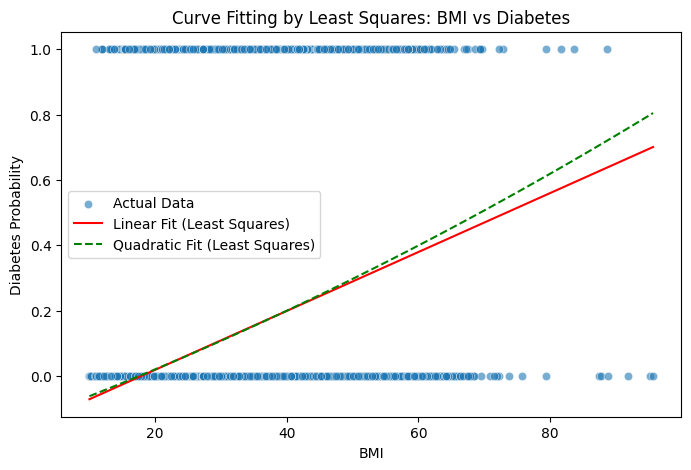

Linear Model: Y = 0.0090X + -0.1611
Quadratic Model: Y = 0.0000X² + 0.0075X + -0.1388


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Load the dataset
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

# Selecting relevant numerical variables
df = df1[["bmi", "diabetes"]].dropna()  # Using BMI as independent variable

# Define a Linear Function for Least Squares Fitting
def linear_model(x, m, c):
    return m * x + c

# Define a Polynomial Function (Quadratic)
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Independent (X) and Dependent (Y) Variables
X = df["bmi"]
Y = df["diabetes"]

# Fit Linear Model using Least Squares
linear_params, _ = curve_fit(linear_model, X, Y)

# Fit Quadratic (Polynomial) Model using Least Squares
quadratic_params, _ = curve_fit(quadratic_model, X, Y)

# Generate Fitted Values
X_fit = np.linspace(X.min(), X.max(), 100)  # Generate smooth curve
Y_linear_fit = linear_model(X_fit, *linear_params)
Y_quadratic_fit = quadratic_model(X_fit, *quadratic_params)

# Visualization
plt.figure(figsize=(8, 5))

# Scatter plot of actual data
sns.scatterplot(x=X, y=Y, label="Actual Data", alpha=0.6)

# Plot Linear Fit
plt.plot(X_fit, Y_linear_fit, color="red", label="Linear Fit (Least Squares)")

# Plot Quadratic Fit
plt.plot(X_fit, Y_quadratic_fit, color="green", linestyle="dashed", label="Quadratic Fit (Least Squares)")

plt.xlabel("BMI")
plt.ylabel("Diabetes Probability")
plt.title("Curve Fitting by Least Squares: BMI vs Diabetes")
plt.legend()
plt.show()

# Output best-fit parameters
print(f"Linear Model: Y = {linear_params[0]:.4f}X + {linear_params[1]:.4f}")
print(f"Quadratic Model: Y = {quadratic_params[0]:.4f}X² + {quadratic_params[1]:.4f}X + {quadratic_params[2]:.4f}")


T-statistic:-18.92118298499434, P-value:1.0525862614635367e-79
Blood glucose levels differ significantly between BMI groups


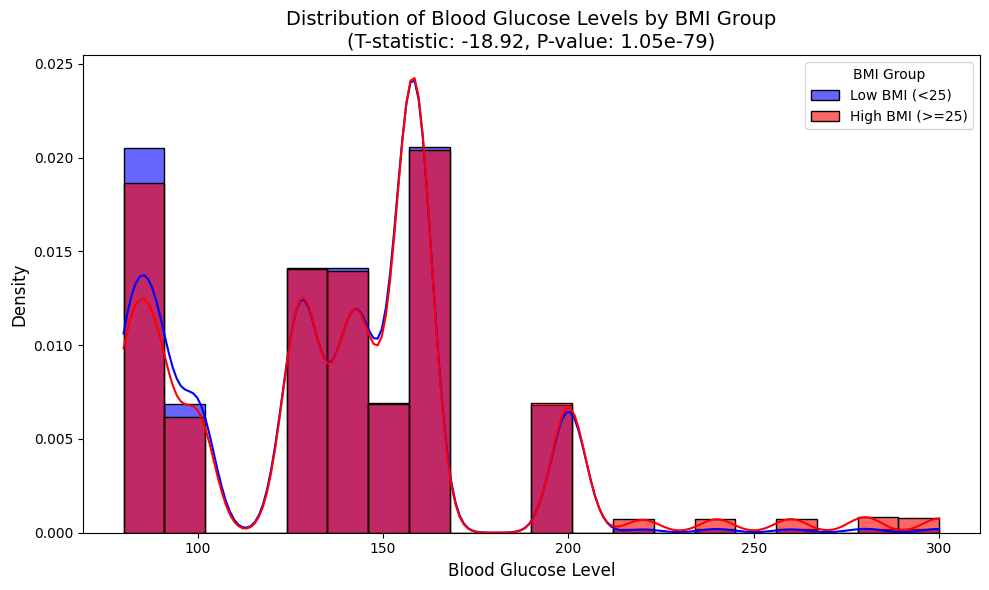

In [ ]:
from scipy.stats import ttest_ind
# Create BMI groups
low_BMI = df1[df1['bmi'] < 25]['blood_glucose_level']
high_BMI = df1[df1['bmi'] >= 25]['blood_glucose_level']
# Two-sample t-test
t_stat, p_value = ttest_ind(low_BMI, high_BMI)
print(f"T-statistic:{t_stat}, P-value:{p_value}")
if p_value < 0.05:
    print("Blood glucose levels differ significantly between BMI groups")
else:
    print("No significant difference in blood glucose levels between BMI groups")

# Combined histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(low_BMI, kde=True, color="blue", label="Low BMI (<25)", stat="density", alpha=0.6, bins=20)
sns.histplot(high_BMI, kde=True, color="red", label="High BMI (>=25)", stat="density", alpha=0.6, bins=20)

# Add title and labels
plt.title(f"Distribution of Blood Glucose Levels by BMI Group\n(T-statistic: {t_stat:.2f}, P-value: {p_value:.2e})", fontsize=14)
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="BMI Group", fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


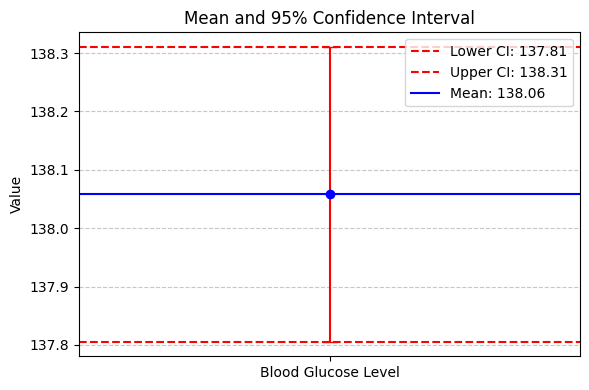

Mean:138.05806, Confidence Interval:(137.80574994112456, 138.31037005887546)


In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
# Calculate confidence intervals
mean = df1['blood_glucose_level'].mean()
std_err = stats.sem(df1['blood_glucose_level'])
ci = stats.t.interval(0.95, len(df1['blood_glucose_level'])-1, loc=mean, scale=std_err)
# Visualization
plt.figure(figsize=(6, 4))
plt.errorbar(1, mean, yerr=[[mean - ci[0]], [ci[1] - mean]], fmt='o', color='blue', ecolor='red', capsize=5)
plt.axhline(ci[0], color='red', linestyle='--', label=f'Lower CI: {ci[0]:.2f}')
plt.axhline(ci[1], color='red', linestyle='--', label=f'Upper CI: {ci[1]:.2f}')
plt.axhline(mean, color='blue', linestyle='-', label=f'Mean: {mean:.2f}')
# Adding labels and title
plt.xticks([1], ['Blood Glucose Level'])
plt.ylabel('Value')
plt.title('Mean and 95% Confidence Interval')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()
print(f"Mean:{mean}, Confidence Interval:{ci}")

Q1 (25th percentile): 100.0
Q3 (75th percentile): 159.0
IQR: 59.0
Lower Bound: 11.5
Upper Bound: 247.5
Number of Outliers: 2038
Outliers:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
38       Male  50.0             1              0         current  27.32   
94     Female  60.0             0              0           never  27.32   
104    Female  80.0             1              0           never  27.32   
125    Female  77.0             0              0           never  31.70   
142    Female  80.0             0              0          former  21.97   
...       ...   ...           ...            ...             ...    ...   
99763  Female  50.0             0              0           never  35.91   
99826    Male  63.0             0              1         No Info  27.32   
99867    Male  64.0             1              0          former  33.12   
99938    Male  55.0             0              1          former  30.42   
99957  Female  61.0             0    

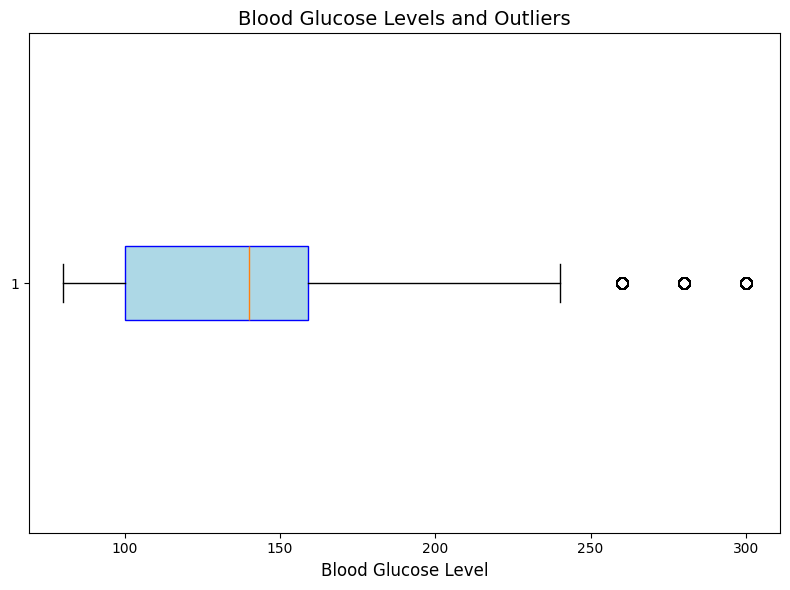

In [ ]:
# Calculate quartiles
Q1 = df1['blood_glucose_level'].quantile(0.25)  # 25th percentile
Q3 = df1['blood_glucose_level'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df1[(df1['blood_glucose_level'] < lower_bound) | (df1['blood_glucose_level'] > upper_bound)]
# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
print("Outliers:")
print(outliers)
# Visualize blood glucose levels and outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df1['blood_glucose_level'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            flierprops=dict(marker='o', color='red', markersize=8))
plt.title('Blood Glucose Levels and Outliers', fontsize=14)
plt.xlabel('Blood Glucose Level', fontsize=12)
plt.tight_layout()
plt.show()

Q1 (25th percentile): 100.0
Q3 (75th percentile): 159.0
IQR: 59.0
Lower Bound: 11.5
Upper Bound: 247.5
Number of Outliers: 2038
Outliers:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
38       Male  50.0             1              0         current  27.32   
94     Female  60.0             0              0           never  27.32   
104    Female  80.0             1              0           never  27.32   
125    Female  77.0             0              0           never  31.70   
142    Female  80.0             0              0          former  21.97   
...       ...   ...           ...            ...             ...    ...   
99763  Female  50.0             0              0           never  35.91   
99826    Male  63.0             0              1         No Info  27.32   
99867    Male  64.0             1              0          former  33.12   
99938    Male  55.0             0              1          former  30.42   
99957  Female  61.0             0    

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


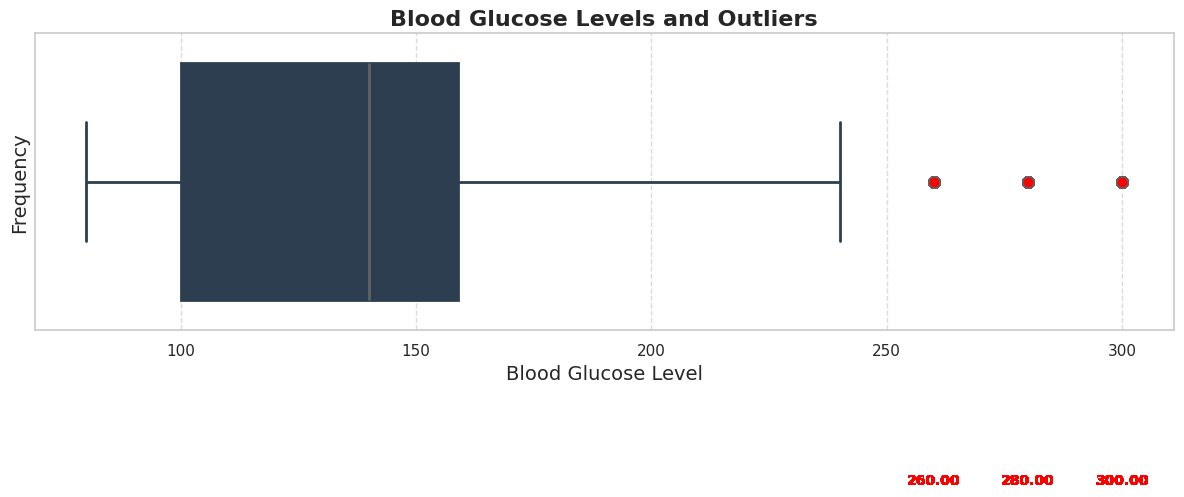

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate quartiles
Q1 = df1['blood_glucose_level'].quantile(0.25)  # 25th percentile
Q3 = df1['blood_glucose_level'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1['blood_glucose_level'] < lower_bound) | (df1['blood_glucose_level'] > upper_bound)]

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
print("Outliers:")
print(outliers)

# Set up the figure for better visual clarity
plt.figure(figsize=(12, 6))

# Seaborn boxplot with better styling and color scheme
sns.set(style="whitegrid")  # Set the style for the background
ax = sns.boxplot(x=df1['blood_glucose_level'], color='#85C1AE', fliersize=8, linewidth=2,
                 boxprops=dict(facecolor='#85C1AE', color='#2C3E50'),
                 whiskerprops=dict(color='#2C3E50'),
                 capprops=dict(color='#2C3E50'),
                 flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'))

# Highlight outliers with annotations
for i, outlier in outliers.iterrows():
    ax.text(outlier['blood_glucose_level'], 1.02, f'{outlier["blood_glucose_level"]:.2f}',
            horizontalalignment='center', color='red', fontsize=10, fontweight='bold')

# Title and labels with improved structure
plt.title('Blood Glucose Levels and Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Blood Glucose Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Clean y-axis since this is a univariate boxplot
plt.yticks([])

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



Correlation Matrix:
                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history     -0.077919  0.228608      0.093177       0.027598   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.077919 -0.022994     0.019957   
age                         0.228608  0.337396     0.101354   
hypertension                0.093177  0.147666     0.080939   
heart_

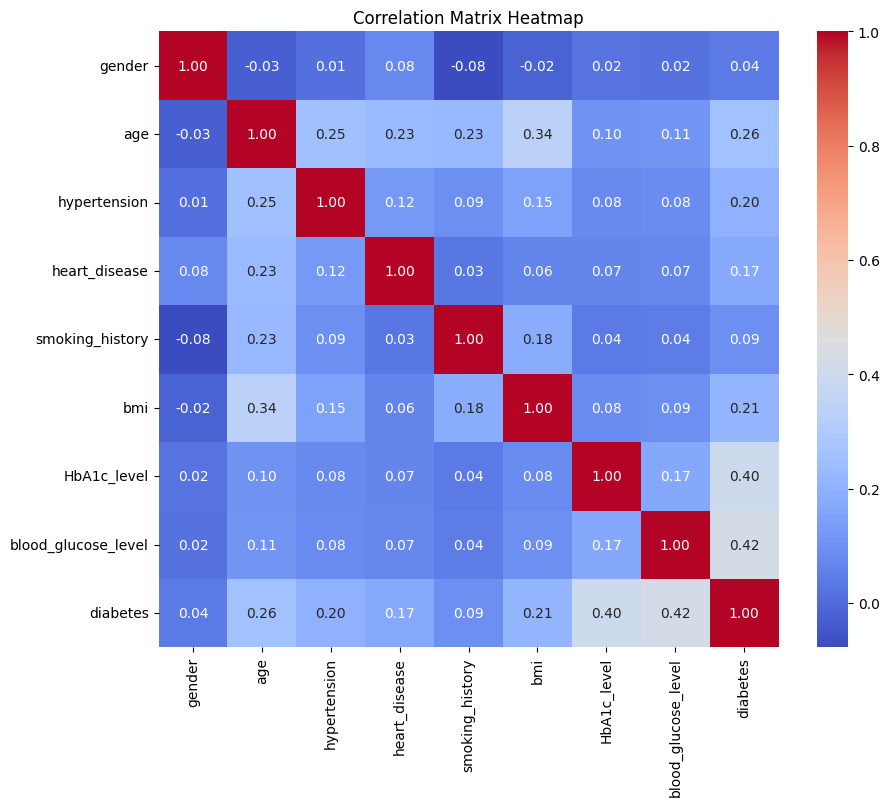

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess categorical variables
# Identify categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using Label Encoding
for col in categorical_columns:
    df1[col] = df1[col].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


F-statistic: 172.12, P-value: 2.74e-39
Variances differ significantly between BMI groups


<ipython-input-9-920a26f4094d>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_BMI, shade=True, color="blue", label="Low BMI (<25)", alpha=0.7)
<ipython-input-9-920a26f4094d>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_BMI, shade=True, color="red", label="High BMI (>=25)", alpha=0.7)


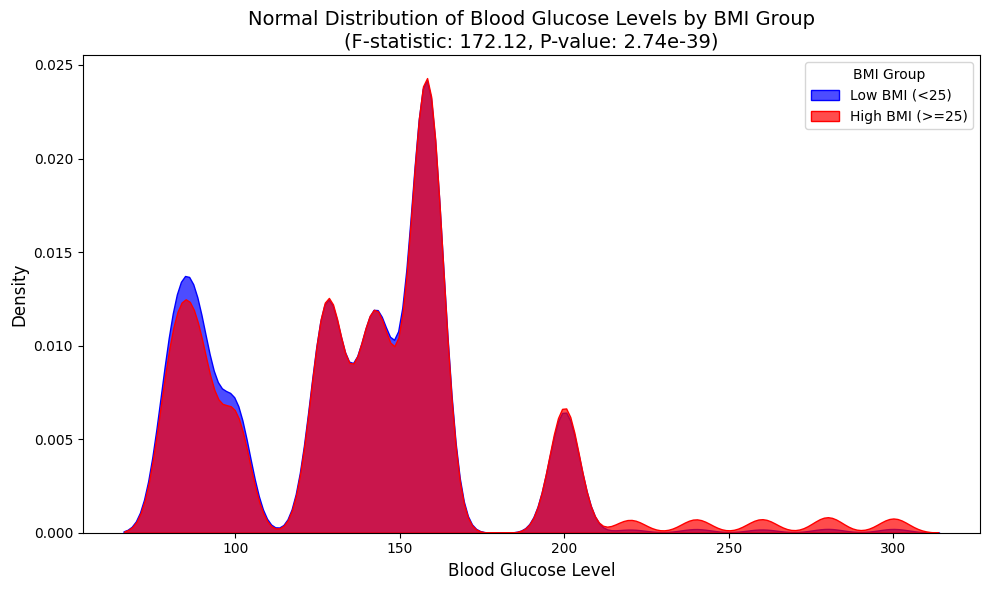

In [ ]:
from scipy.stats import levene
import matplotlib.pyplot as plt
import seaborn as sns

# F-test for equality of variances
f_stat, p_value_f = levene(low_BMI, high_BMI)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value_f:.2e}")

if p_value_f < 0.05:
    print("Variances differ significantly between BMI groups")
else:
    print("No significant difference in variances between BMI groups")

# Visualization: KDE plot for normal distribution comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(low_BMI, shade=True, color="blue", label="Low BMI (<25)", alpha=0.7)
sns.kdeplot(high_BMI, shade=True, color="red", label="High BMI (>=25)", alpha=0.7)

# Add details to the plot
plt.title(f"Normal Distribution of Blood Glucose Levels by BMI Group\n(F-statistic: {f_stat:.2f}, P-value: {p_value_f:.2e})", fontsize=14)
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="BMI Group", fontsize=10)
plt.tight_layout()
plt.show()


Chi-square statistic: 66.29, P-value: 3.90e-16
There is a significant association between BMI and blood glucose categories


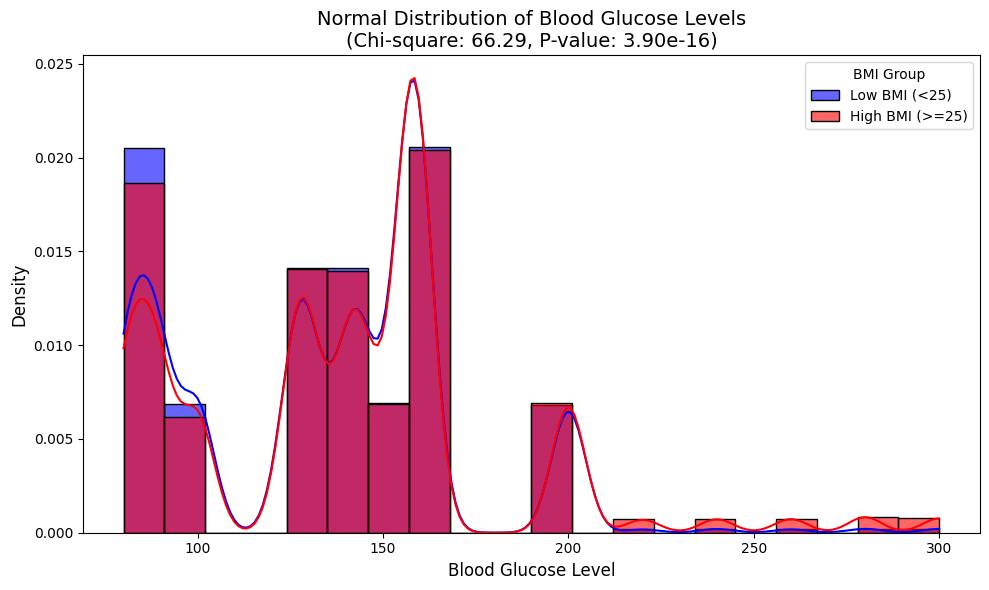

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns

# Categorize blood glucose levels
df1['glucose_category'] = pd.cut(df1['blood_glucose_level'], bins=[0, 140, float('inf')], labels=['Normal', 'High'])

# Create contingency table
contingency_table = pd.crosstab(df1['glucose_category'], df1['bmi'] >= 25)
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat:.2f}, P-value: {p_value_chi2:.2e}")
if p_value_chi2 < 0.05:
    print("There is a significant association between BMI and blood glucose categories")
else:
    print("No significant association between BMI and blood glucose categories")

# Visualization: Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df1[df1['bmi'] < 25]['blood_glucose_level'], kde=True, color="blue", label="Low BMI (<25)", alpha=0.6, bins=20, stat="density")
sns.histplot(df1[df1['bmi'] >= 25]['blood_glucose_level'], kde=True, color="red", label="High BMI (>=25)", alpha=0.6, bins=20, stat="density")

# Add details to the plot
plt.title(f"Normal Distribution of Blood Glucose Levels\n(Chi-square: {chi2_stat:.2f}, P-value: {p_value_chi2:.2e})", fontsize=14)
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="BMI Group", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df1[["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level",]]
y = df1['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log= LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log.score(X_test,y_test)

0.95875

In [ ]:
log.score(X_train,y_train)

0.960625

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Feature selection and data splitting
X = df1[["age", "bmi", "HbA1c_level", "blood_glucose_level"]]
y = df1['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
log = LogisticRegression()
log.fit(X_train, y_train)

# Function to predict diabetes based on BMI, blood glucose level, HbA1c level, and age
def predict_diabetes(bmi, blood_glucose_level, HbA1c_level, age):
    sample_data = np.array([[age, bmi, HbA1c_level, blood_glucose_level]])

    # Make a prediction
    prediction = log.predict(sample_data)

    # Output result
    if prediction == 1:
        return f"The person is likely to have diabetes "
    else:
        return f"The person is unlikely to have diabetes "

# Example usage
result = predict_diabetes(bmi=25.1, blood_glucose_level=120, HbA1c_level=5.7, age=25)
print(result)


The person is unlikely to have diabetes 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
